In [83]:
import pandas as pd
import os
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

43
Grafik kaydedildi: plots/AGM_G2_Guardian_256_GB.png
Grafik kaydedildi: plots/Honor_Magic_7_Pro_512_GB.png
Grafik kaydedildi: plots/Honor_Magic_V2_512_GB.png
Grafik kaydedildi: plots/Honor_Magic_V3_512_GB.png
Grafik kaydedildi: plots/Huawei_M_Pen_Lite_Kalem_Matepad_Se_Tablet_Kalemi_(Huawei_Türkiye_Garantili).png
Grafik kaydedildi: plots/Huawei_Pura_70_Ultra_512_GB.png
Grafik kaydedildi: plots/Nubia_Red_Magic_9S_Pro_512_GB_16_GB_Gümüş.png
Grafik kaydedildi: plots/Samsung_Galaxy_S22_Ultra_256_GB_12_GB.png
Grafik kaydedildi: plots/Samsung_Galaxy_S23_Ultra_256_GB_12_GB.png
Grafik kaydedildi: plots/Samsung_Galaxy_S23_Ultra_512_GB_12_GB.png
Grafik kaydedildi: plots/Samsung_Galaxy_S24_Ultra_256_GB.png
Grafik kaydedildi: plots/Samsung_Galaxy_S25_Plus_256_GB.png
Grafik kaydedildi: plots/Samsung_Galaxy_S25_Ultra_1_TB.png
Grafik kaydedildi: plots/Samsung_Galaxy_S25_Ultra_512_GB.png
Grafik kaydedildi: plots/Samsung_Galaxy_Z_Flip_5_256_GB.png
Grafik kaydedildi: plots/Samsung_Galaxy_Z_Flip_5_512_G

C:\Users\pc\AppData\Local\Temp\ipykernel_8948\938770914.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


Grafik kaydedildi: plots/Samsung_Galaxy_Z_Fold_6_512_GB.png
Grafik kaydedildi: plots/Tecno_Phantom_V_Fold_2_512_GB.png
Grafik kaydedildi: plots/Ulefone_Armor_27T_Pro_256_GB.png
Grafik kaydedildi: plots/Vivo_X100_Pro_512_GB.png
Grafik kaydedildi: plots/Vivo_X200_Pro_512_GB.png
Grafik kaydedildi: plots/Xiaomi_14_Ultra_512_GB.png
Grafik kaydedildi: plots/Xiaomi_14T_Pro_1_TB.png
Grafik kaydedildi: plots/Xiaomi_15_UItra_512_GB.png
Grafik kaydedildi: plots/Xiaomi_MIX_Flip_512_GB.png
Grafik kaydedildi: plots/iPhone_12_Pro_Max_512_GB.png
Grafik kaydedildi: plots/iPhone_13_Pro_Max_256_GB.png
Grafik kaydedildi: plots/iPhone_14_Plus_256_GB.png
Grafik kaydedildi: plots/iPhone_14_Plus_512_GB.png
Grafik kaydedildi: plots/iPhone_14_Pro_Max_128_GB.png
Grafik kaydedildi: plots/iPhone_14_Pro_Max_256_GB.png
Grafik kaydedildi: plots/iPhone_14_Pro_Max_512_GB.png
Grafik kaydedildi: plots/iPhone_15_Pro_Max_1_TB.png
Grafik kaydedildi: plots/iPhone_15_Pro_Max_256_GB.png
Grafik kaydedildi: plots/iPhone_15_Pro_M

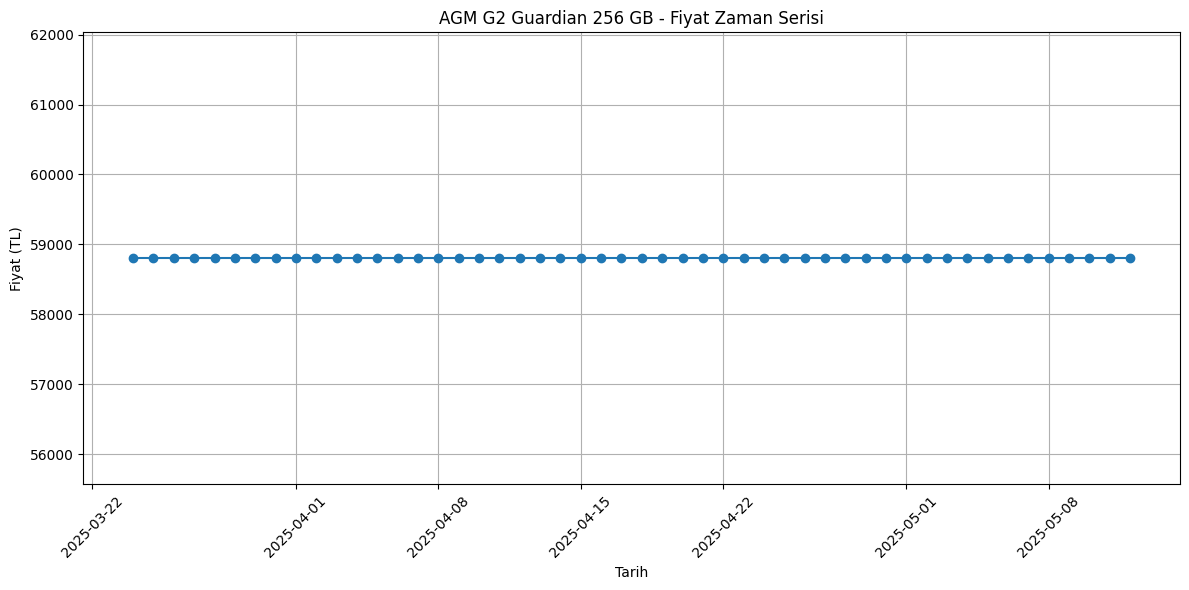

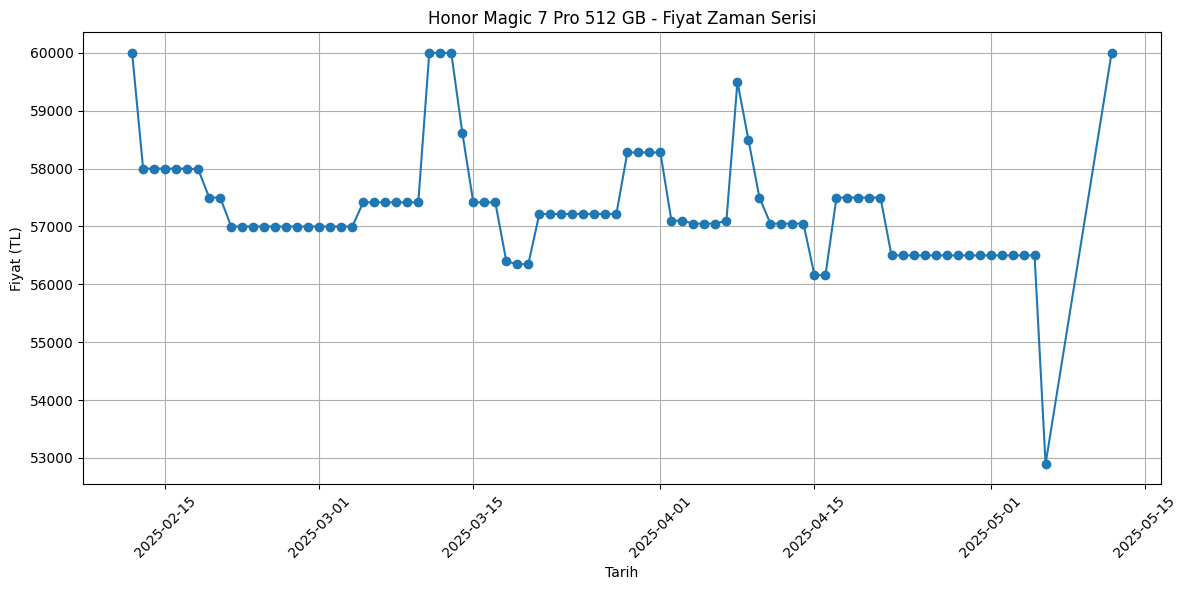

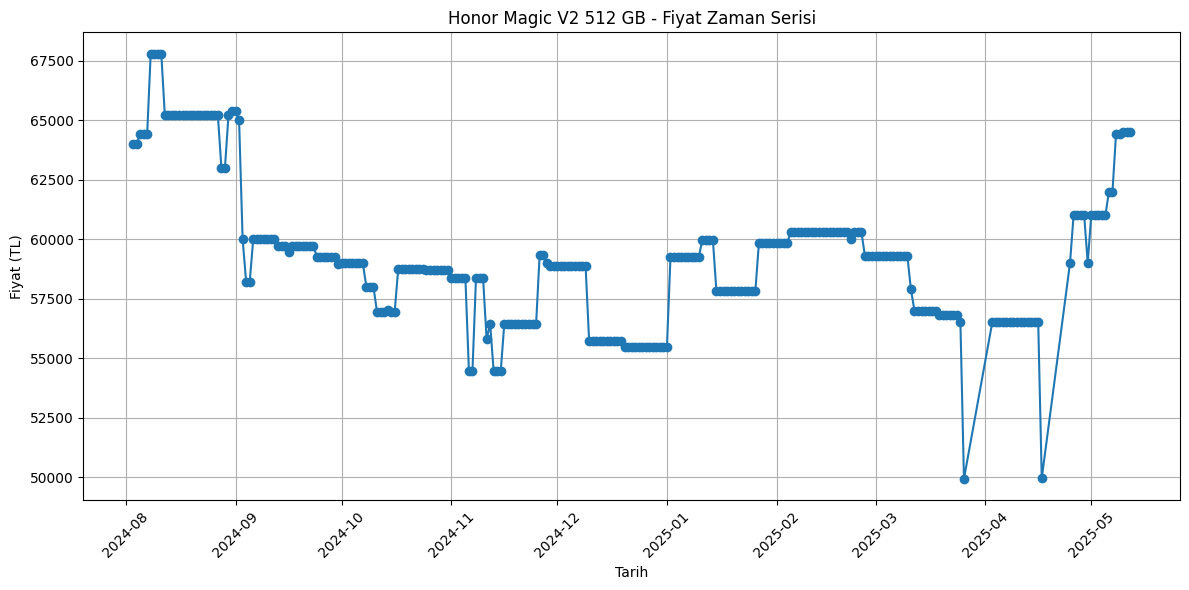

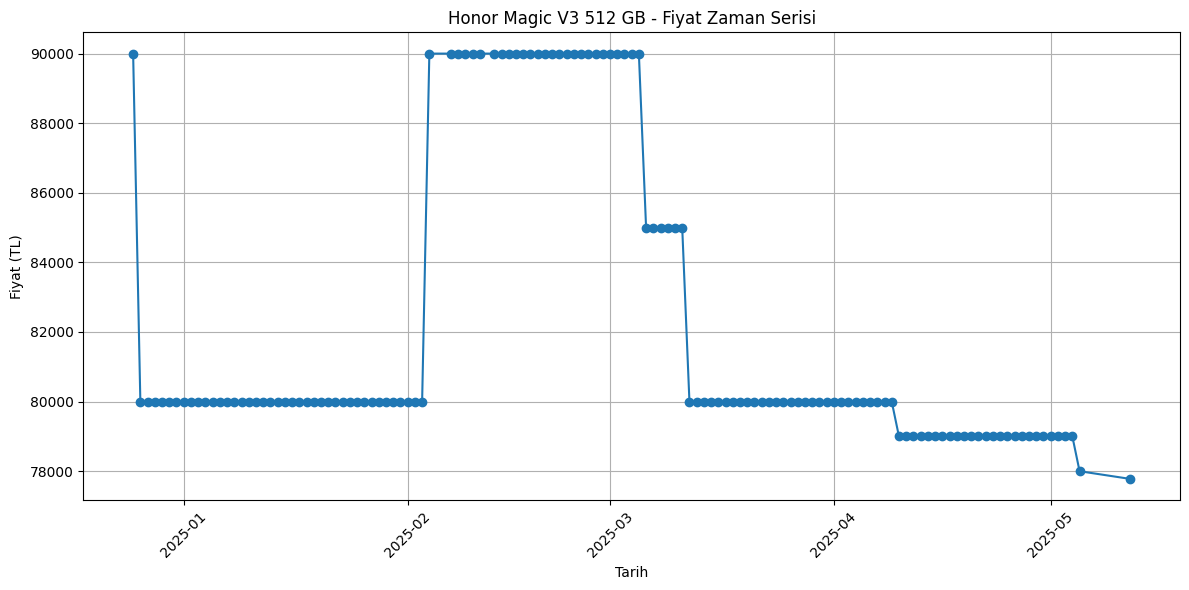

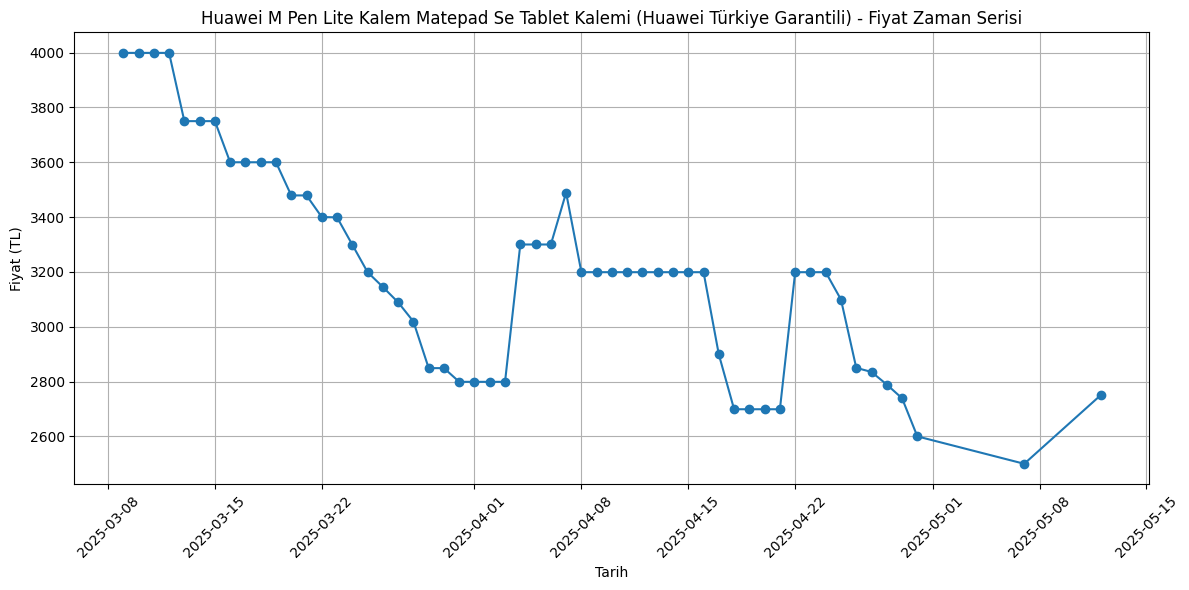

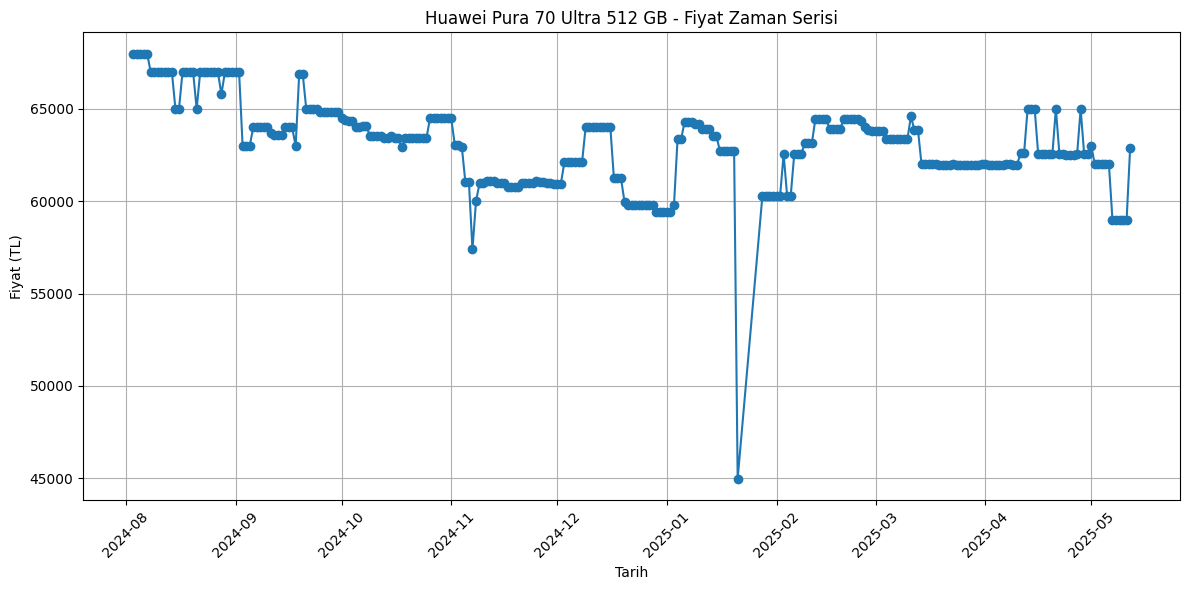

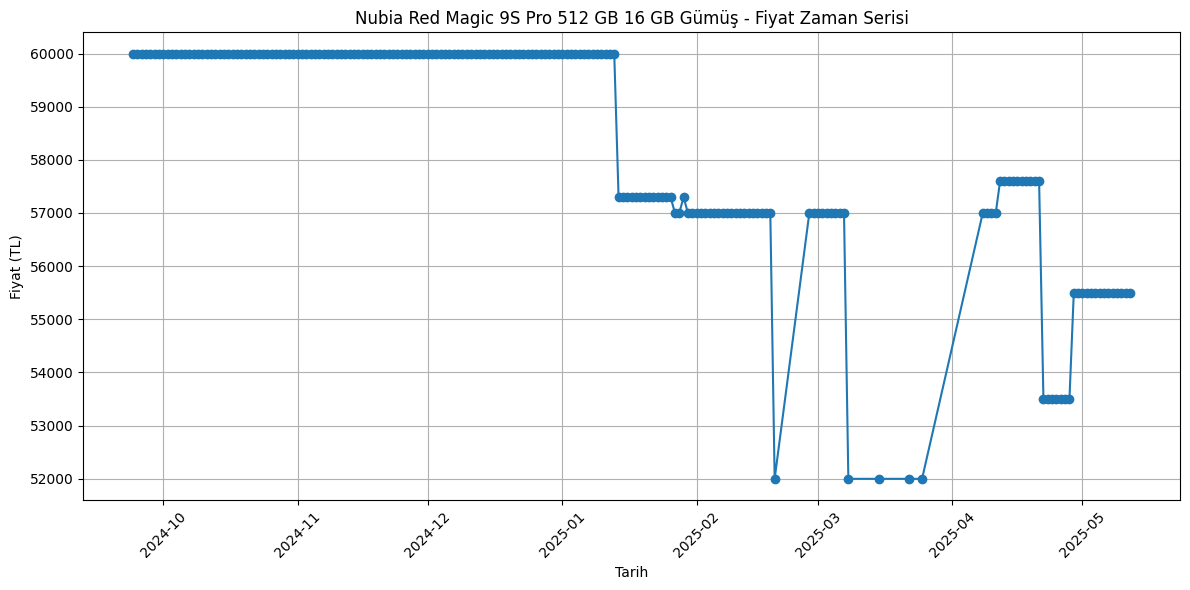

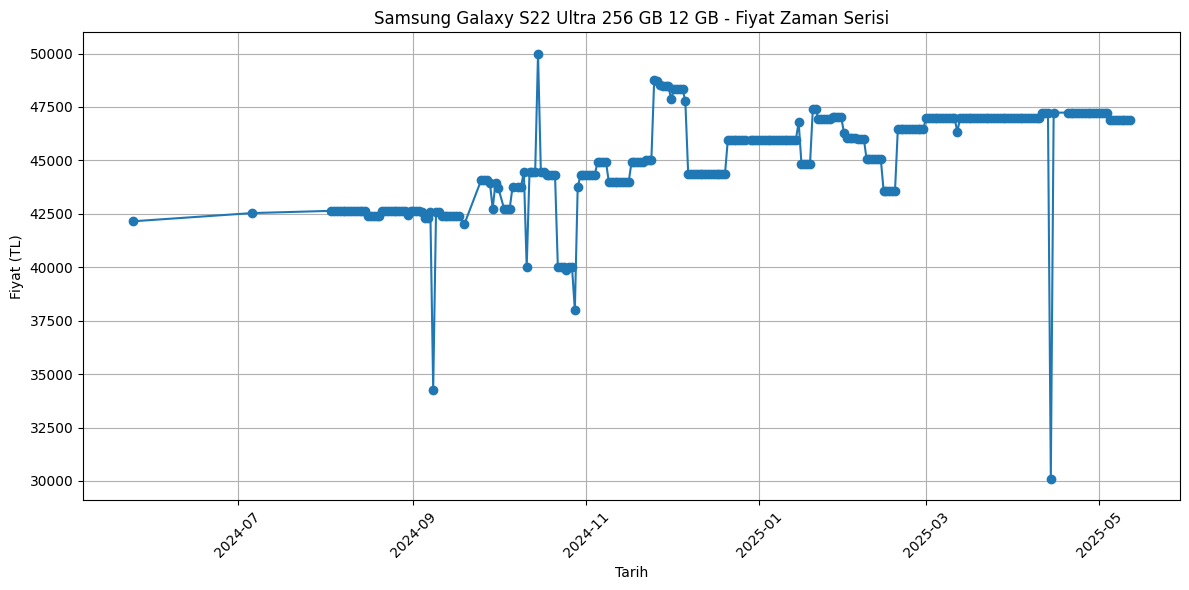

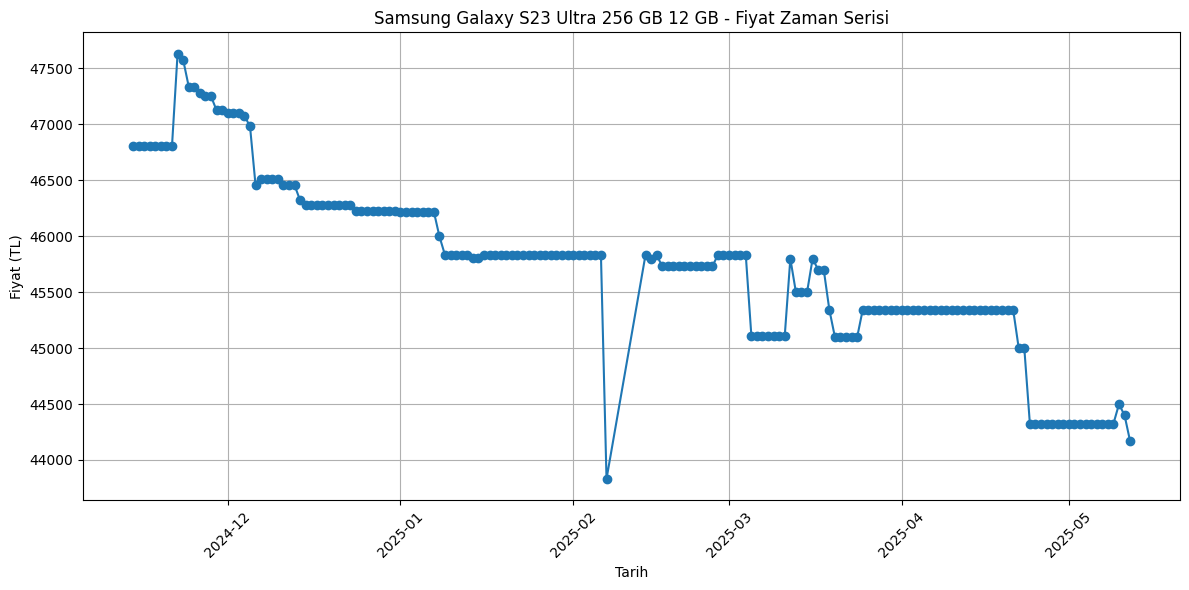

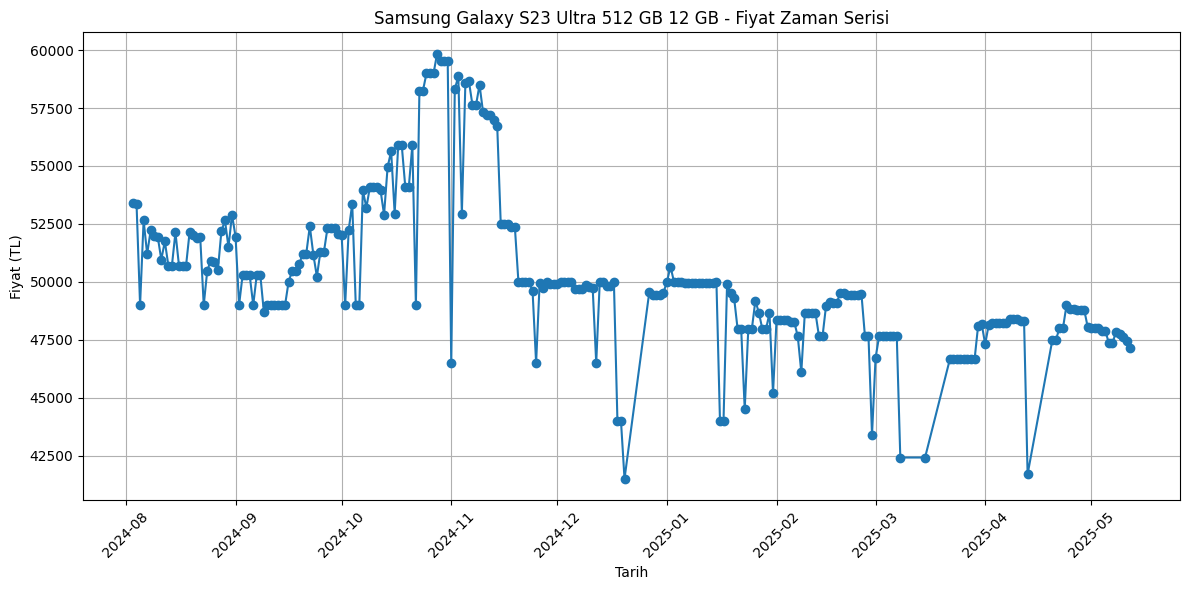

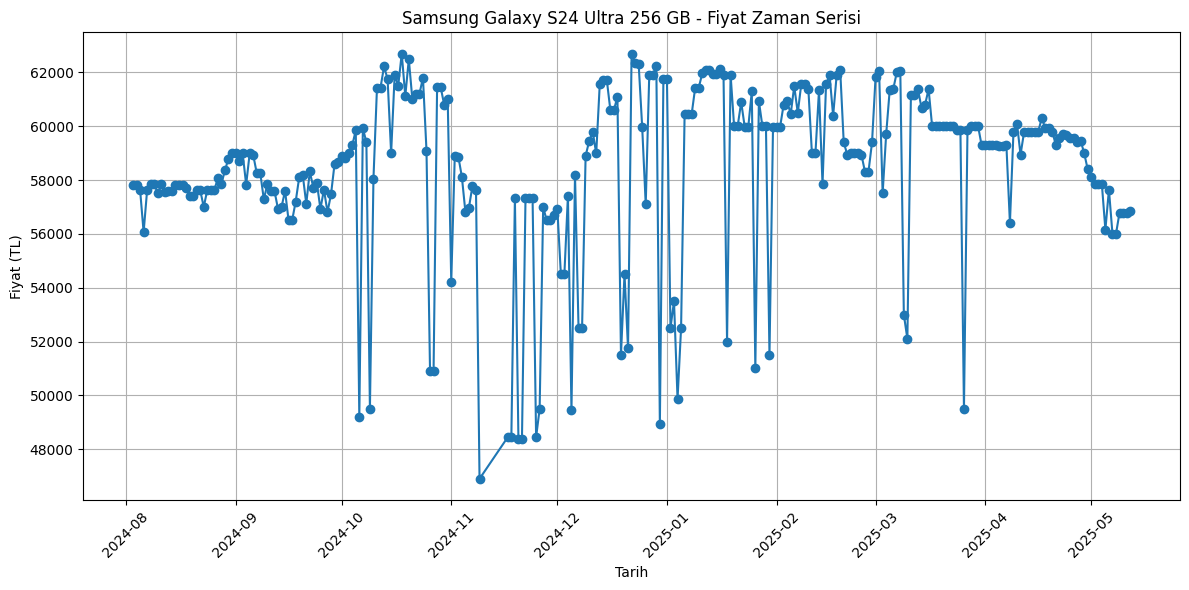

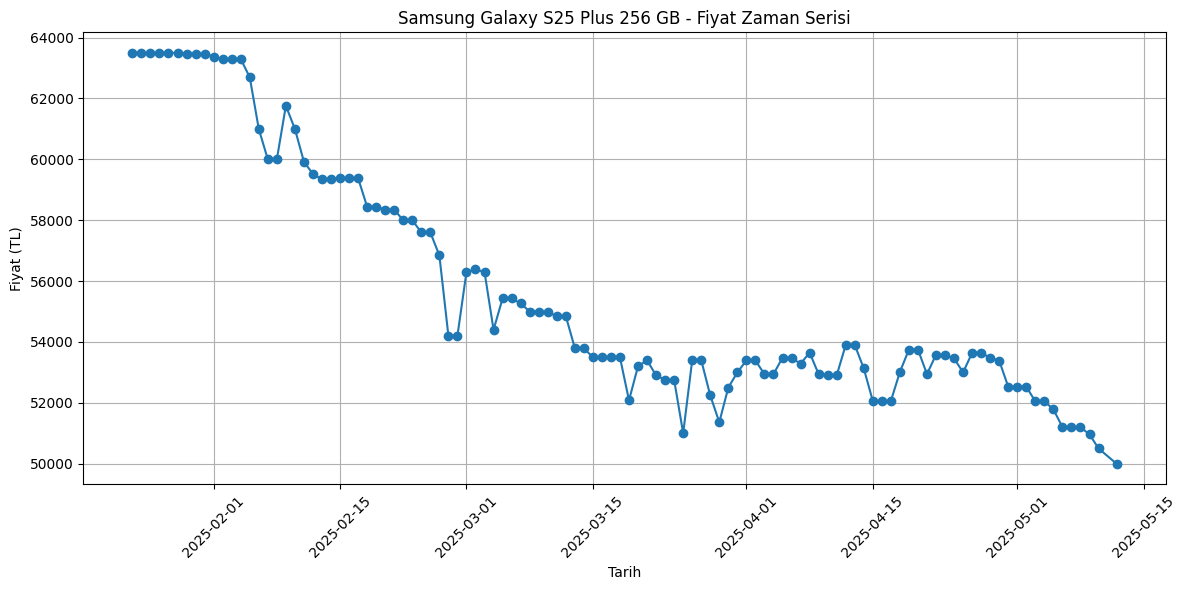

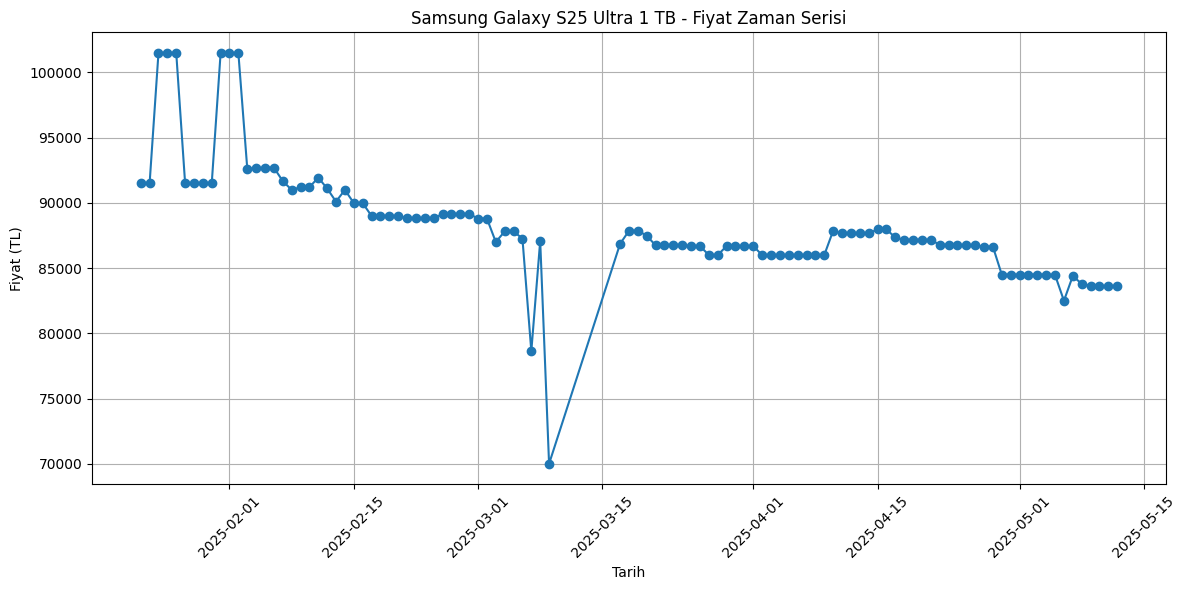

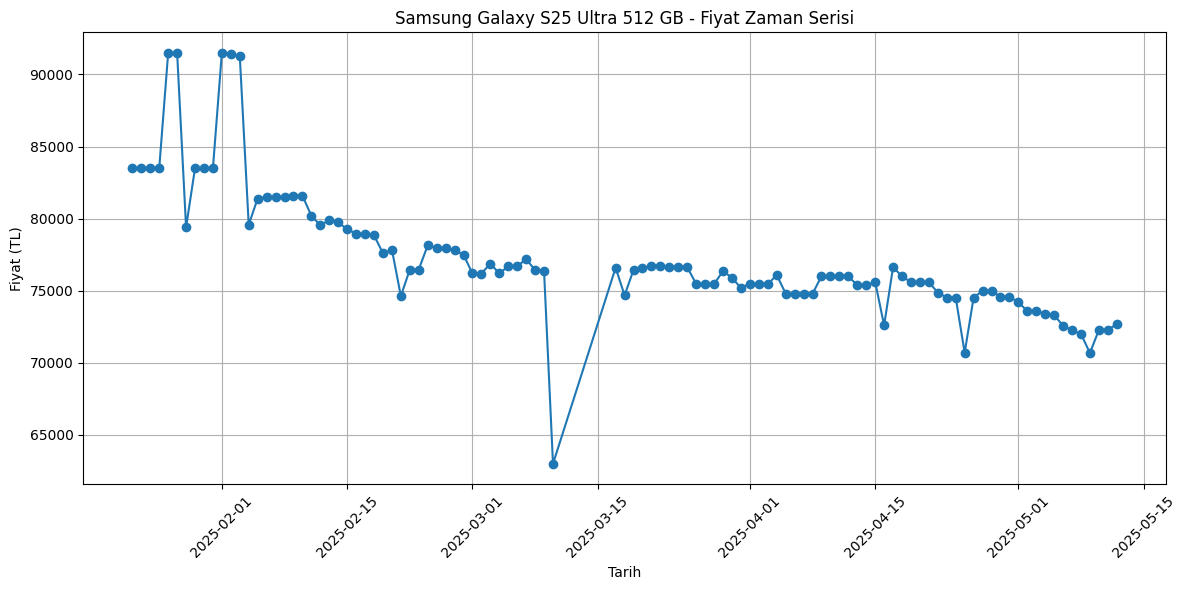

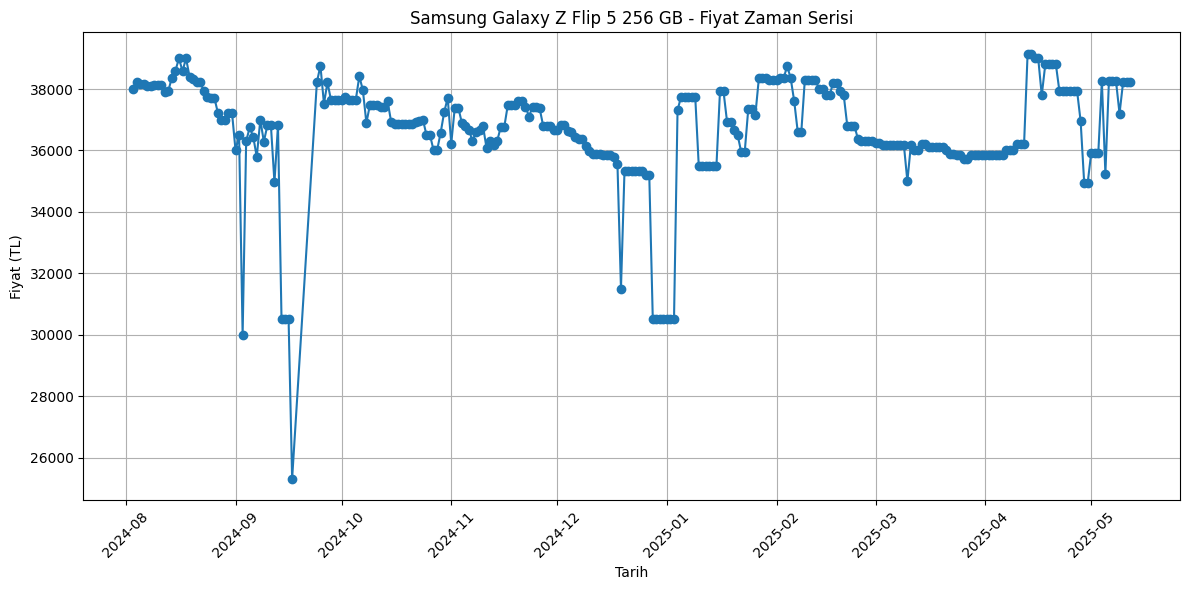

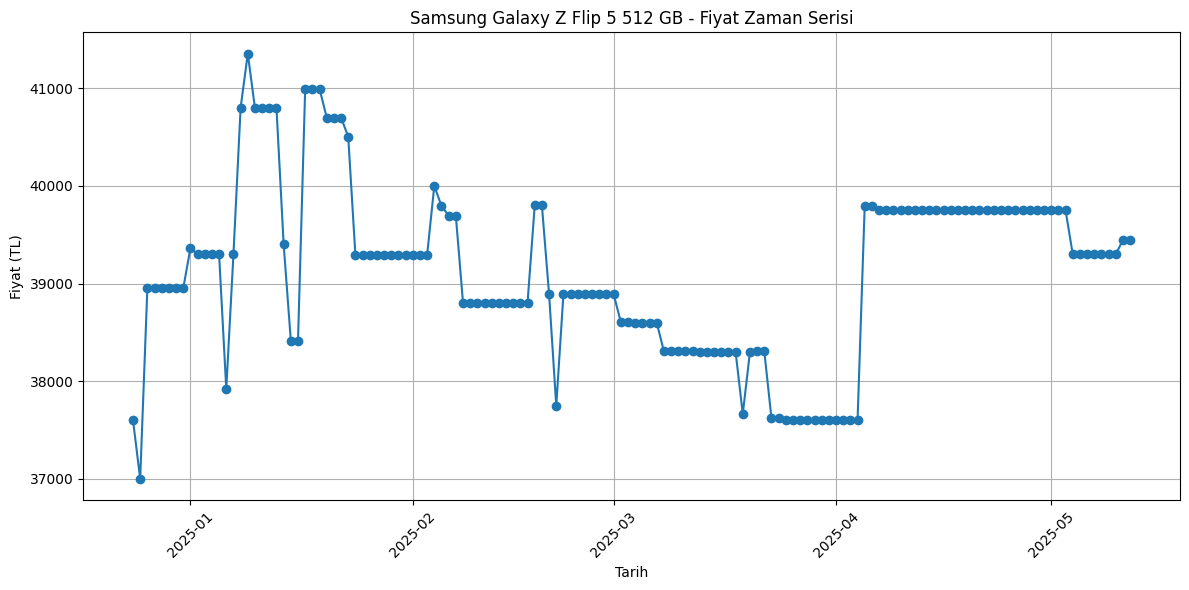

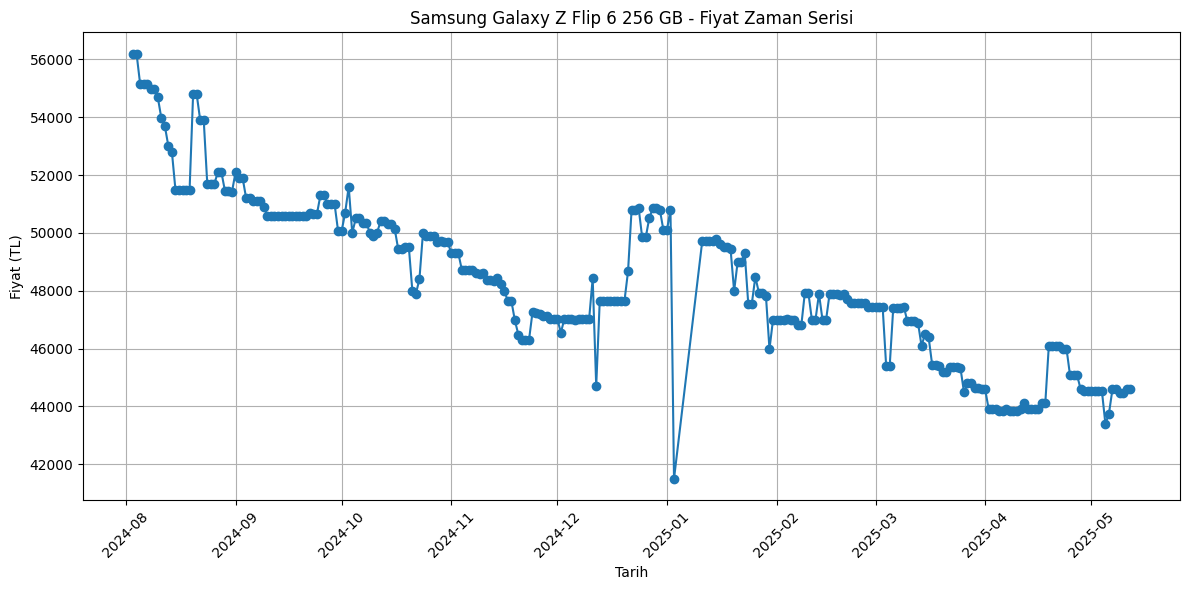

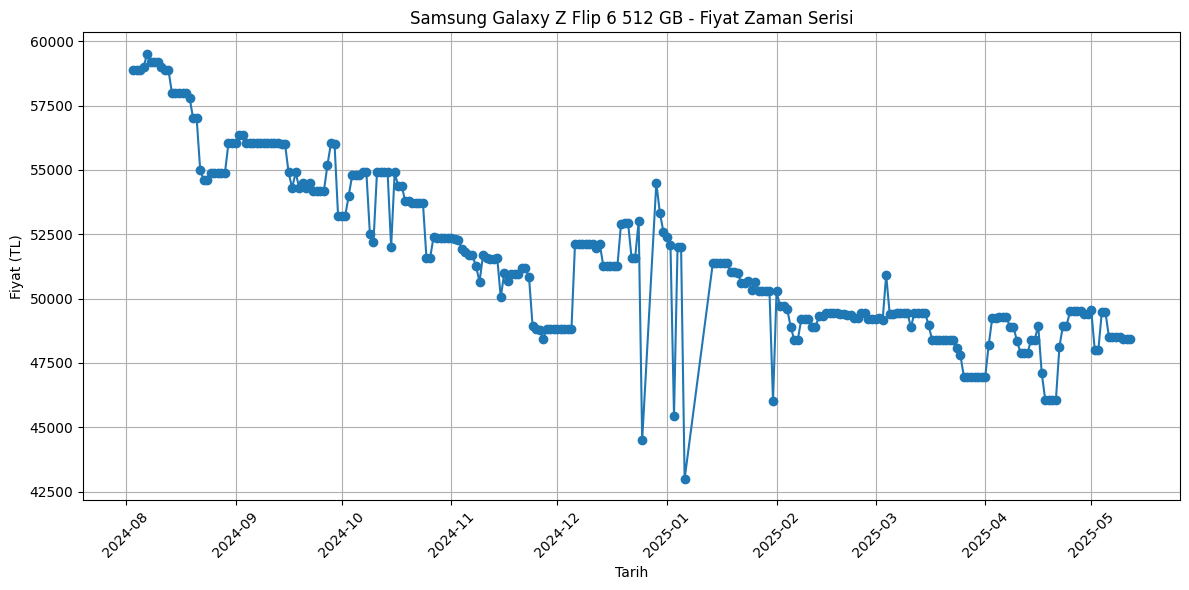

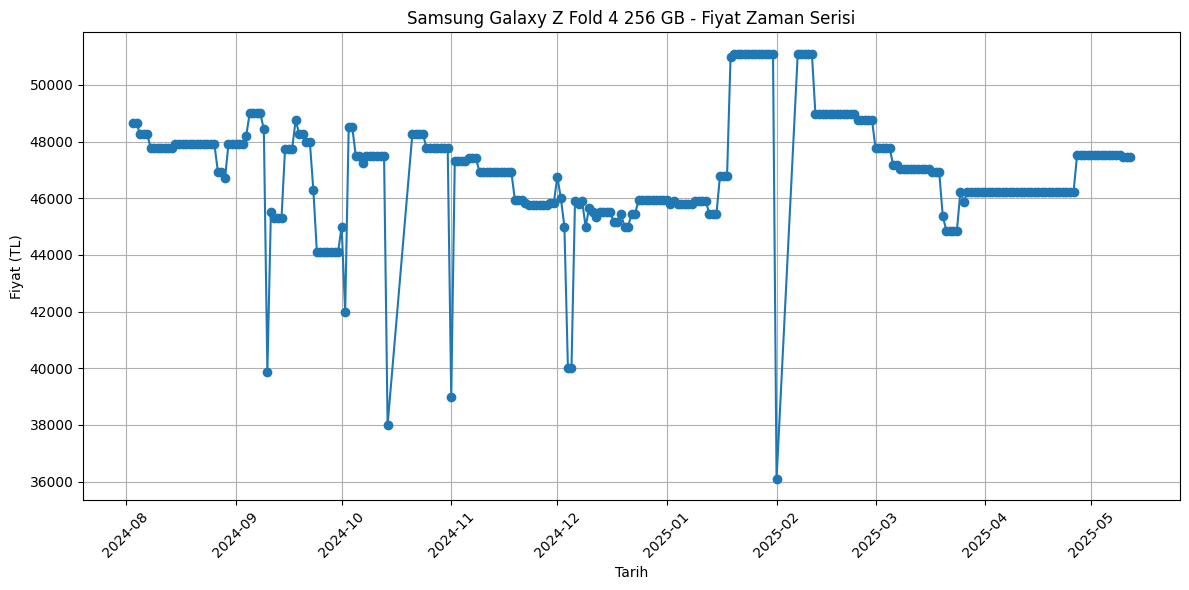

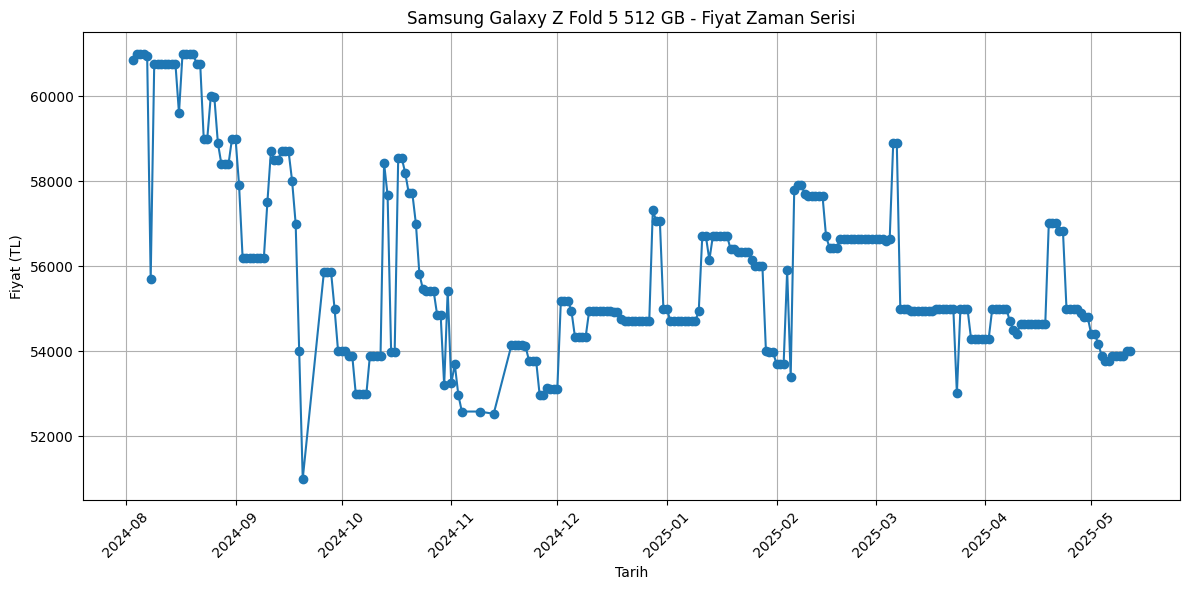

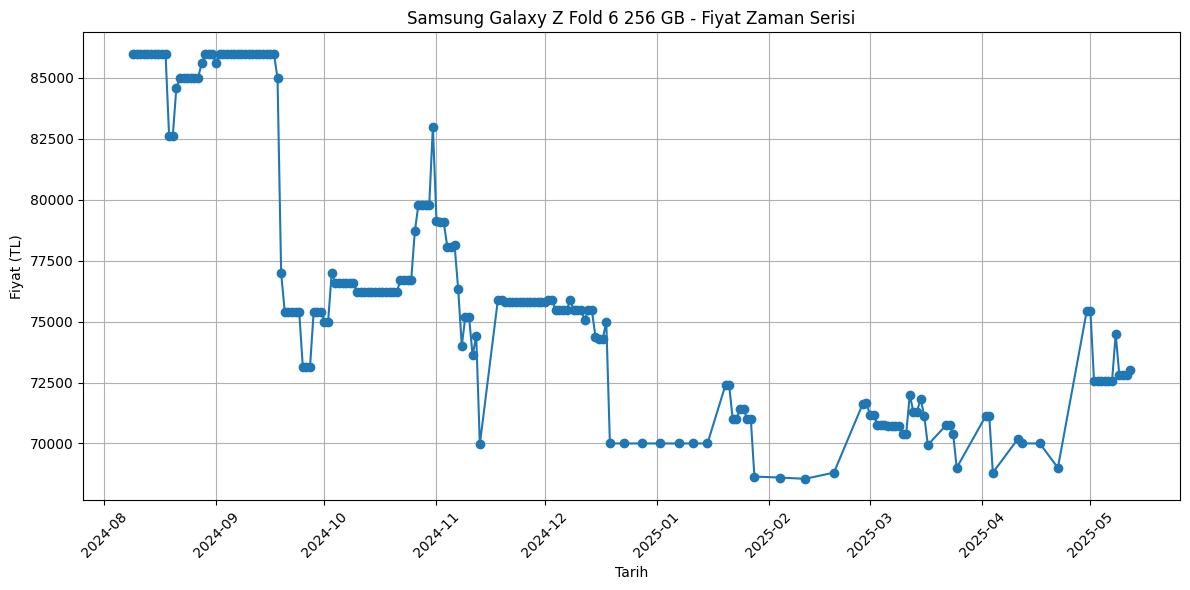

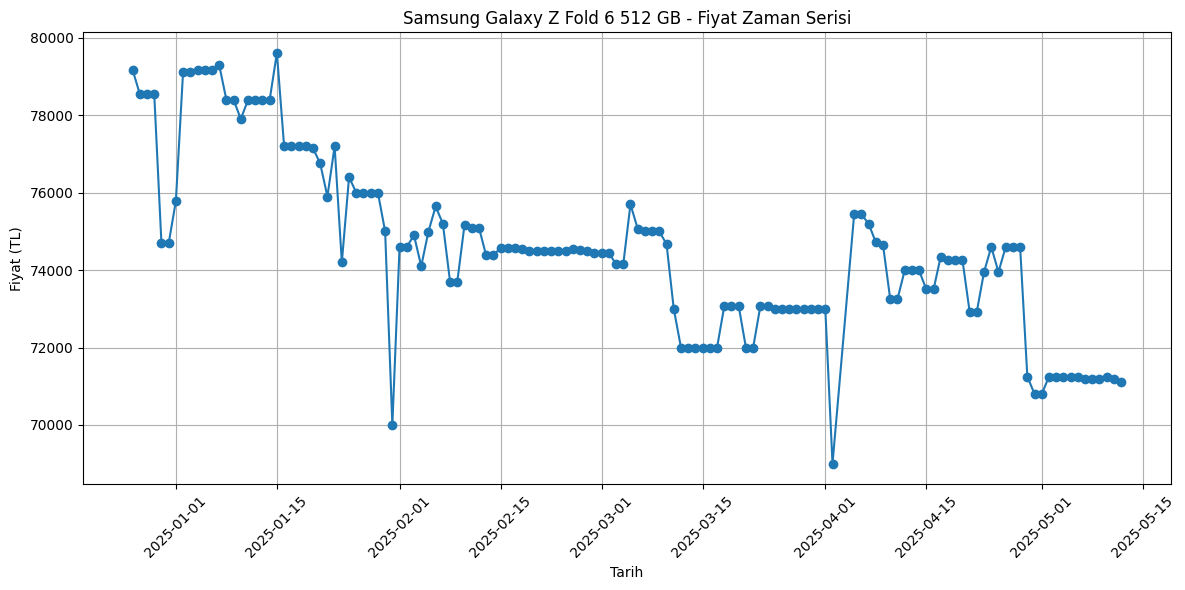

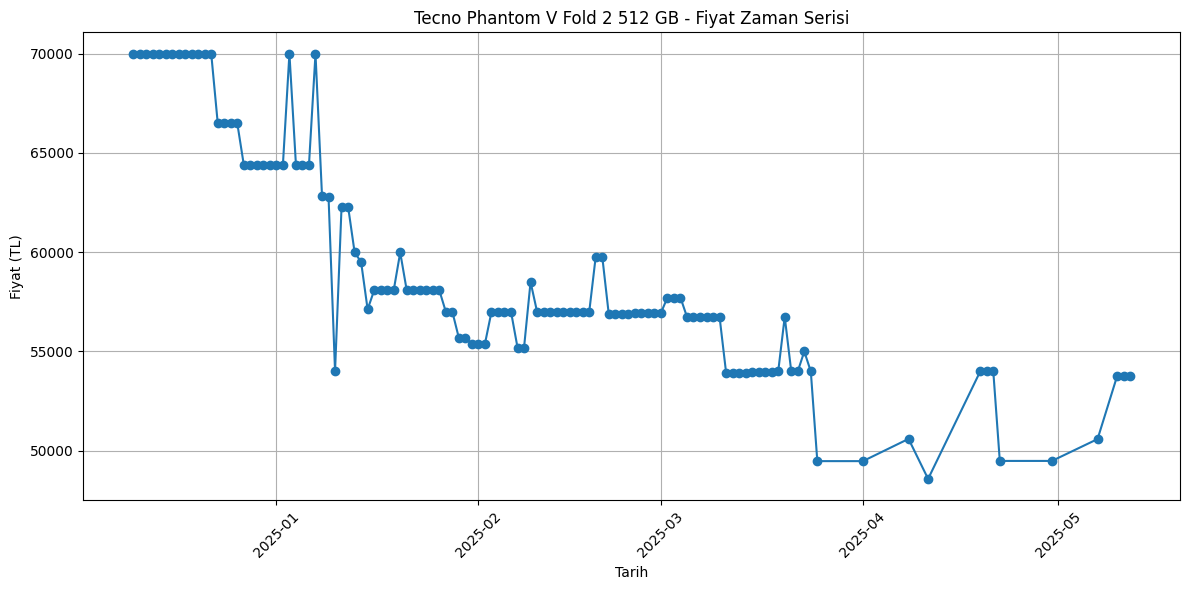

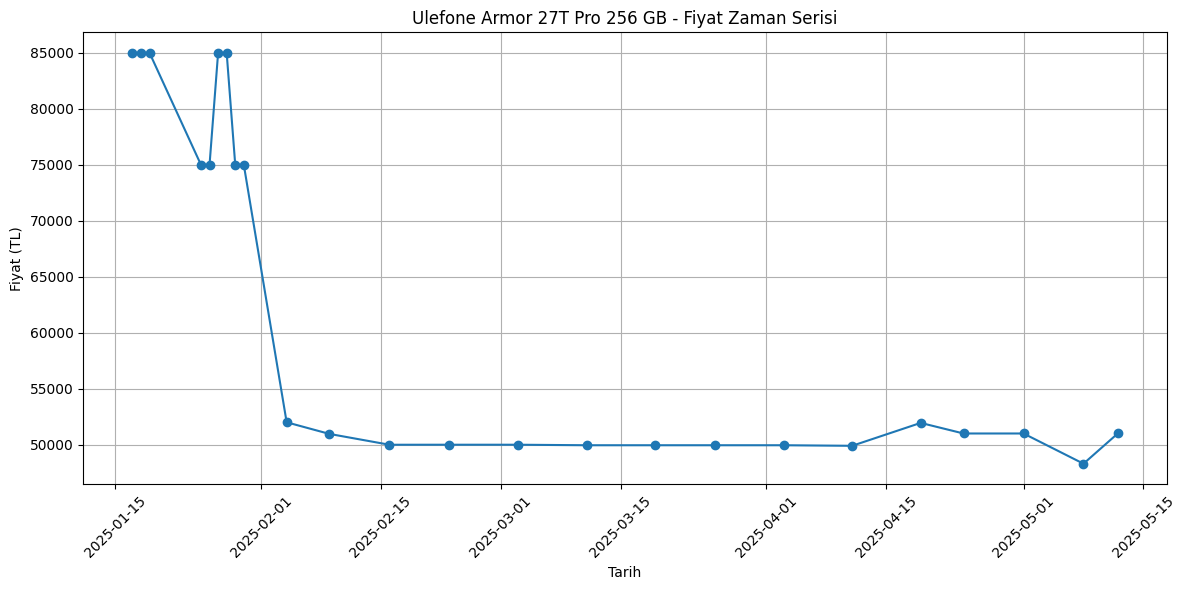

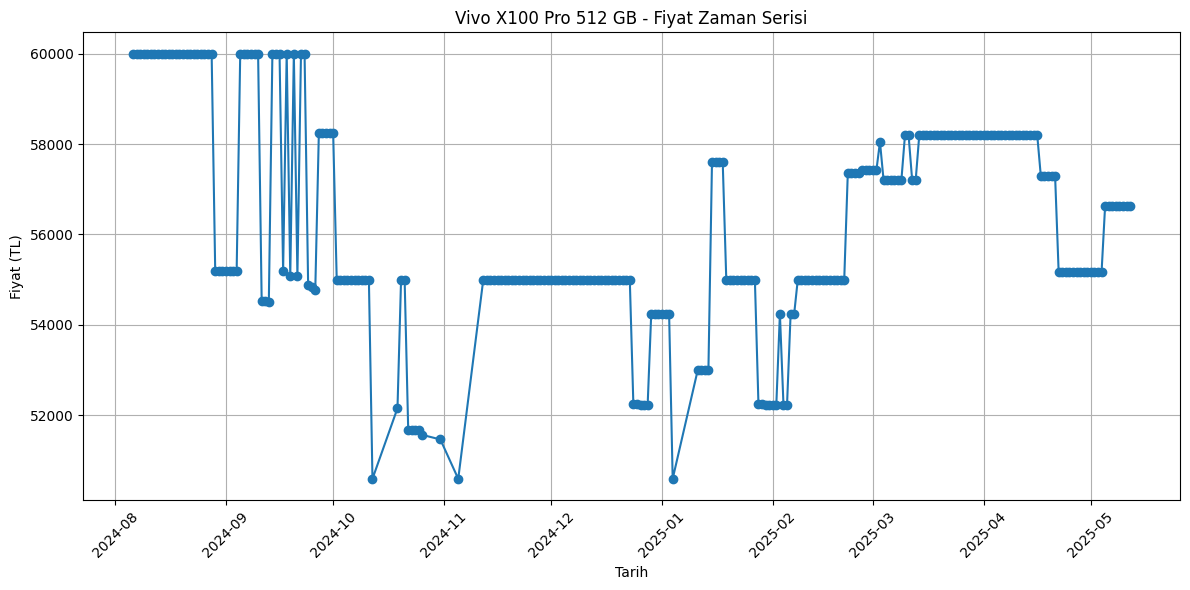

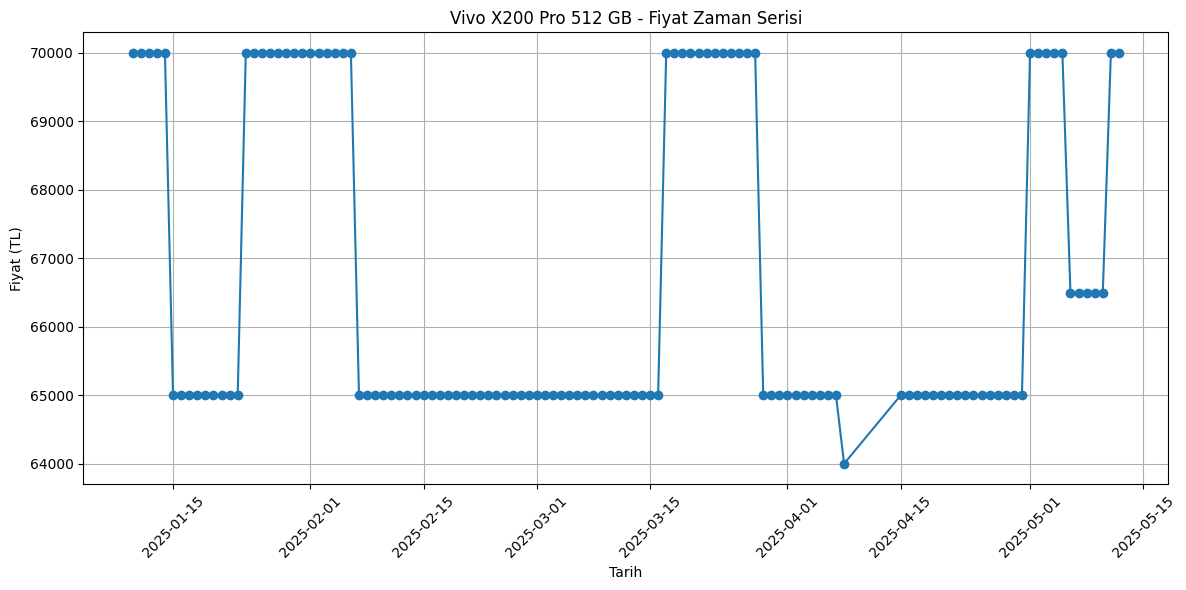

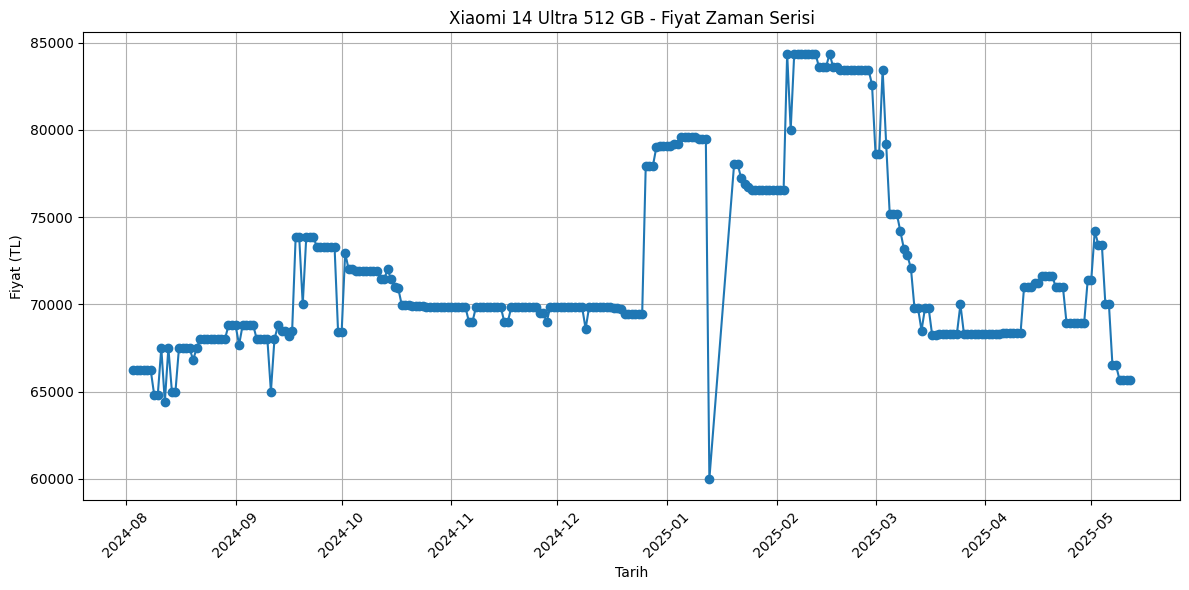

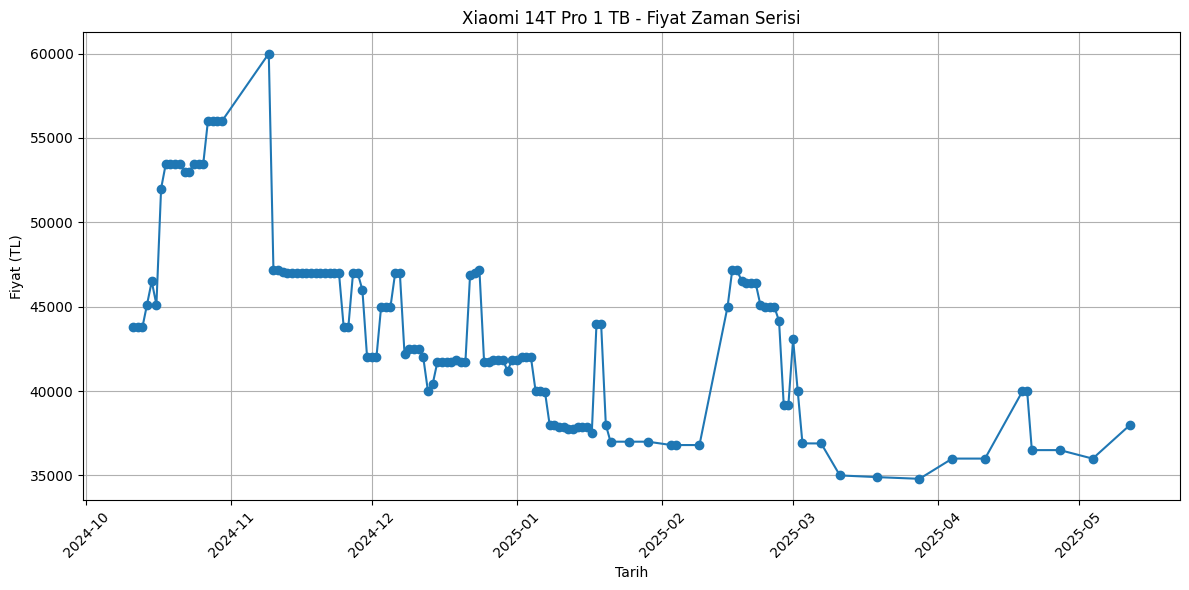

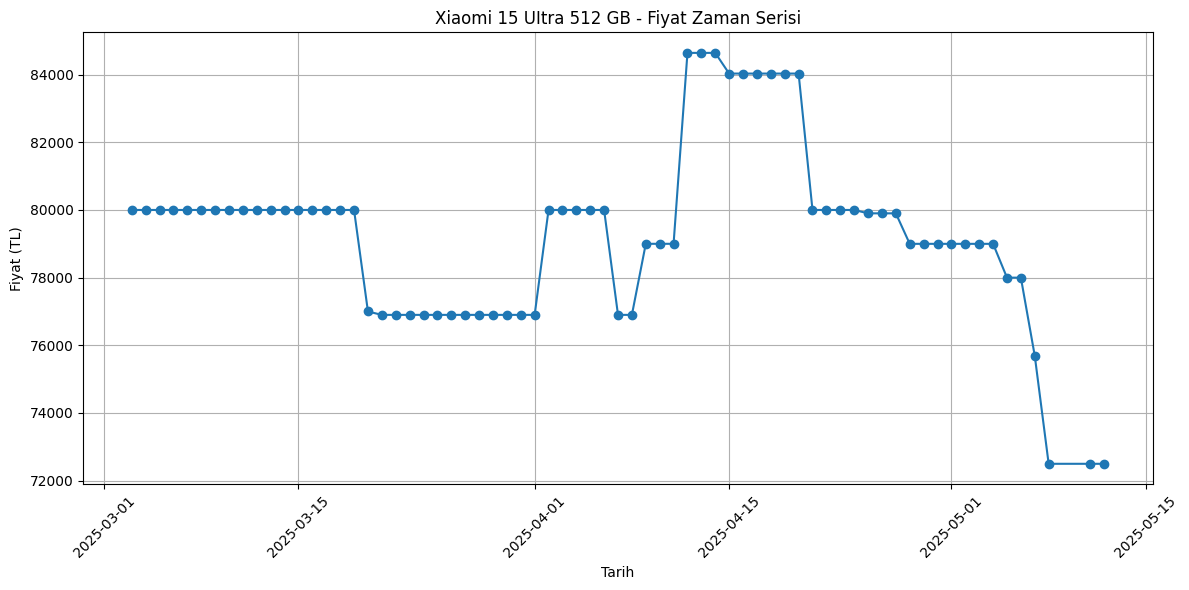

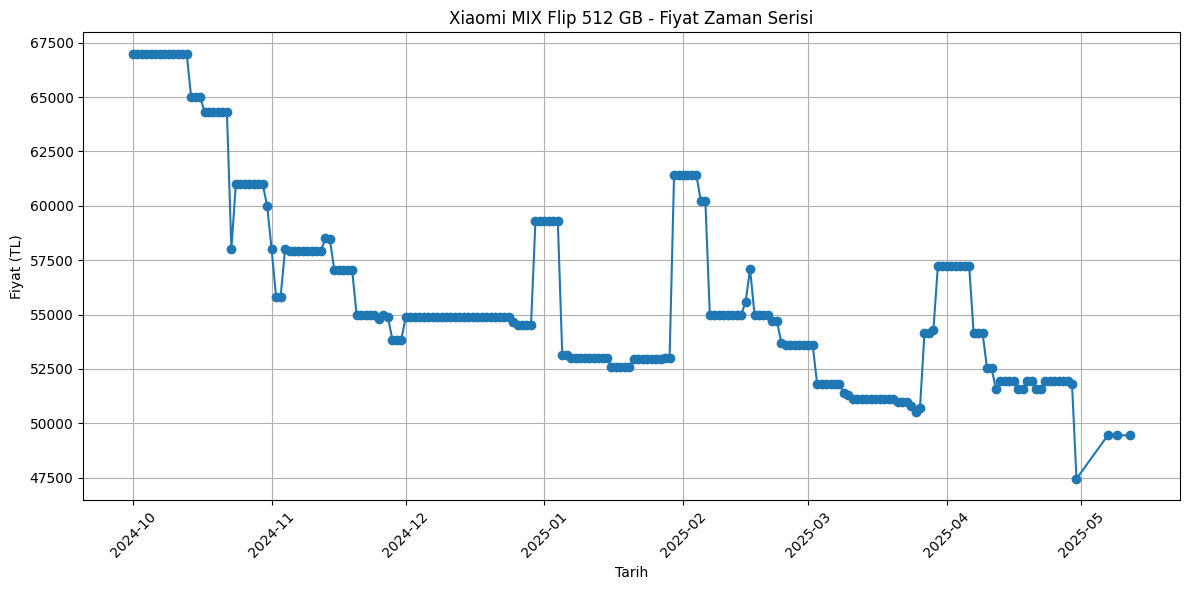

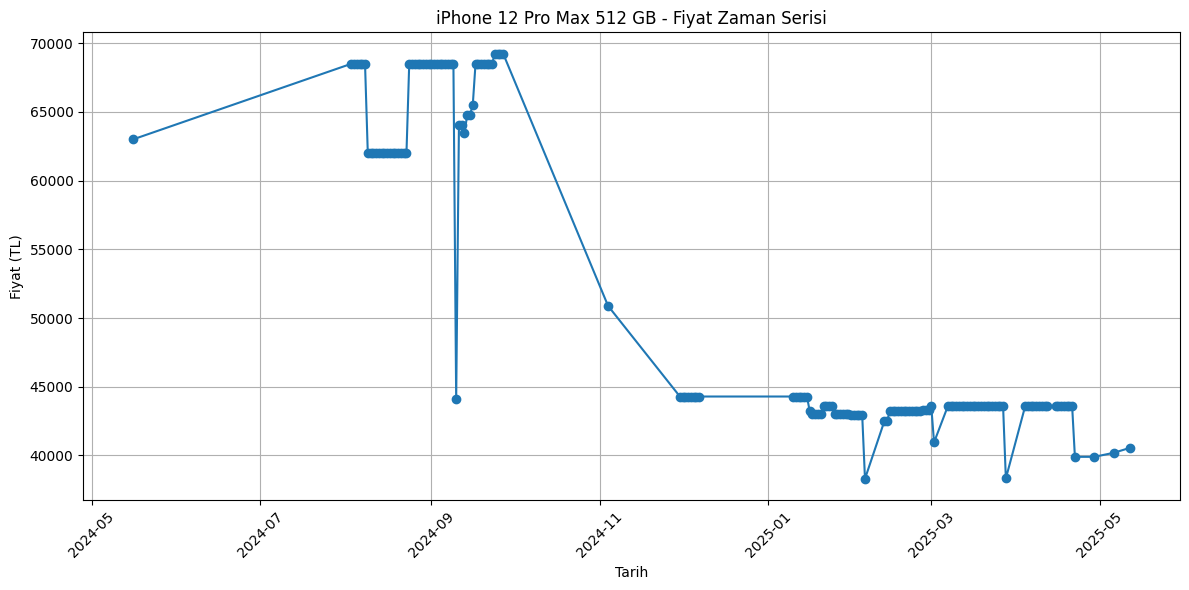

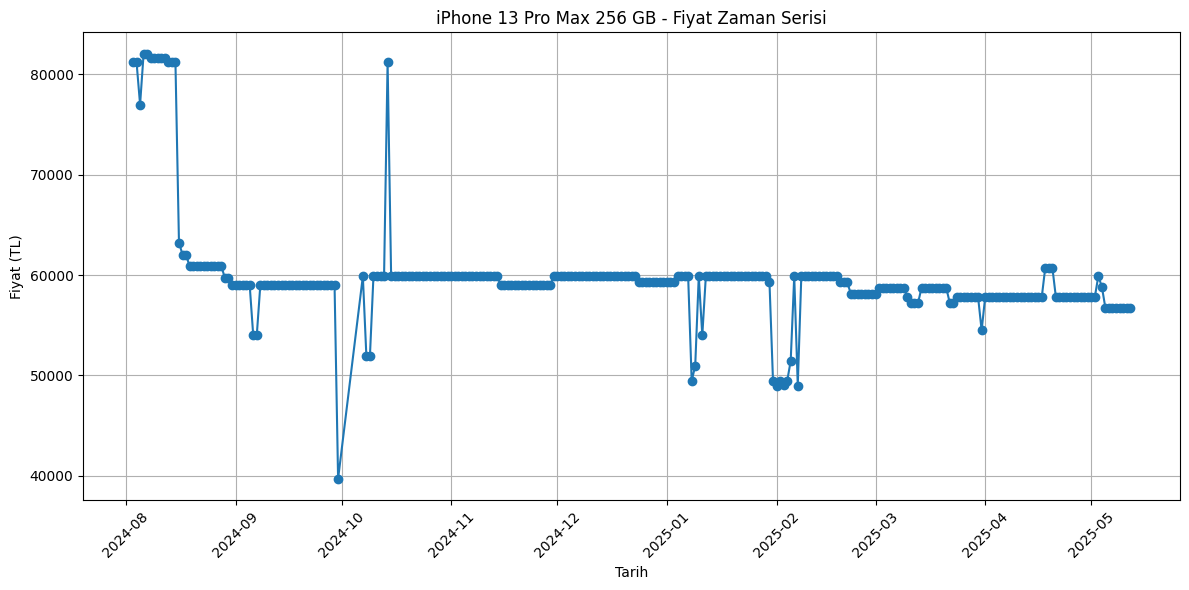

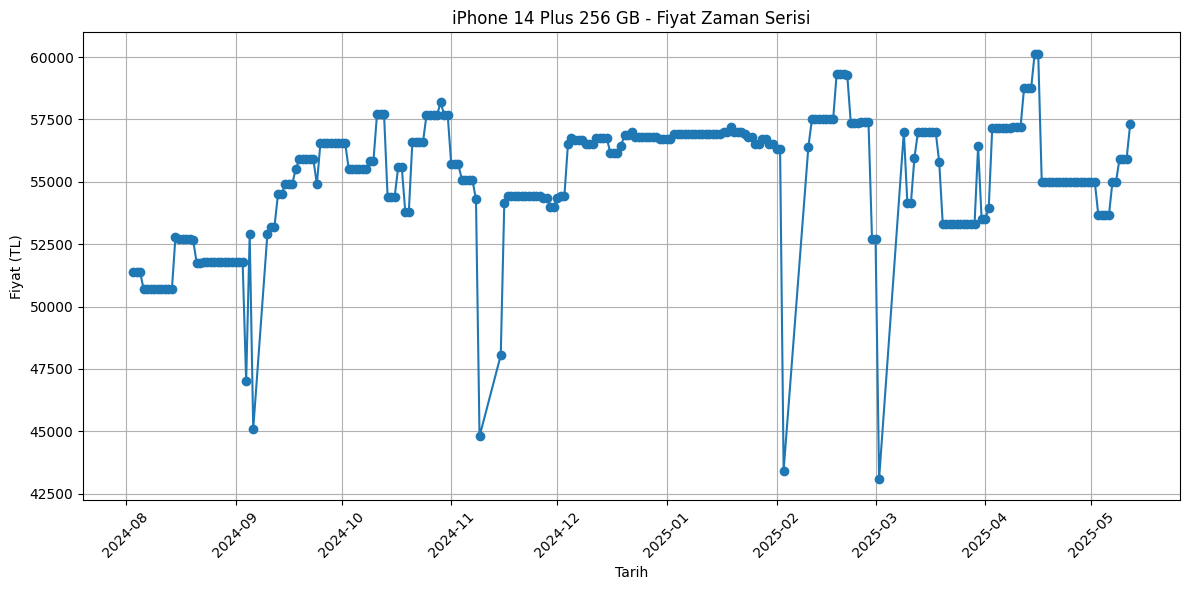

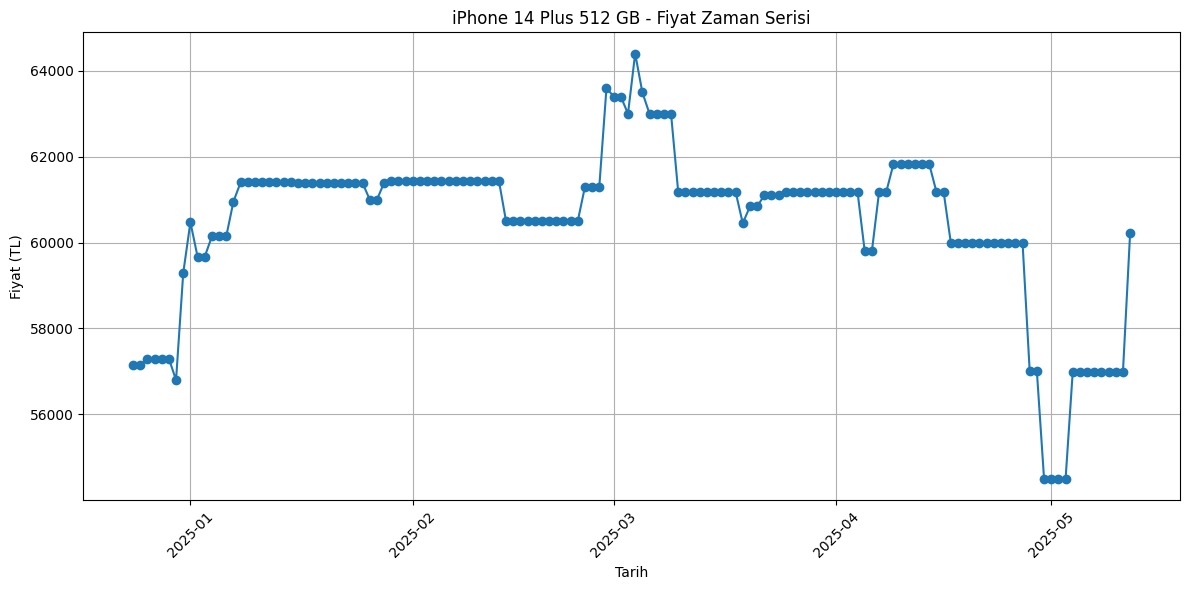

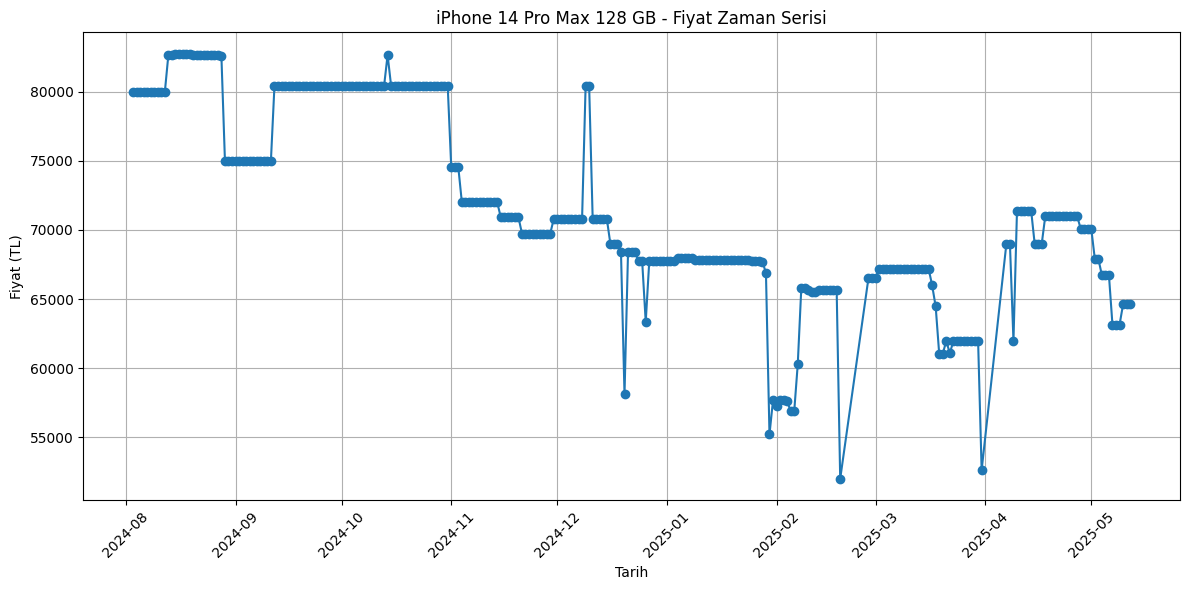

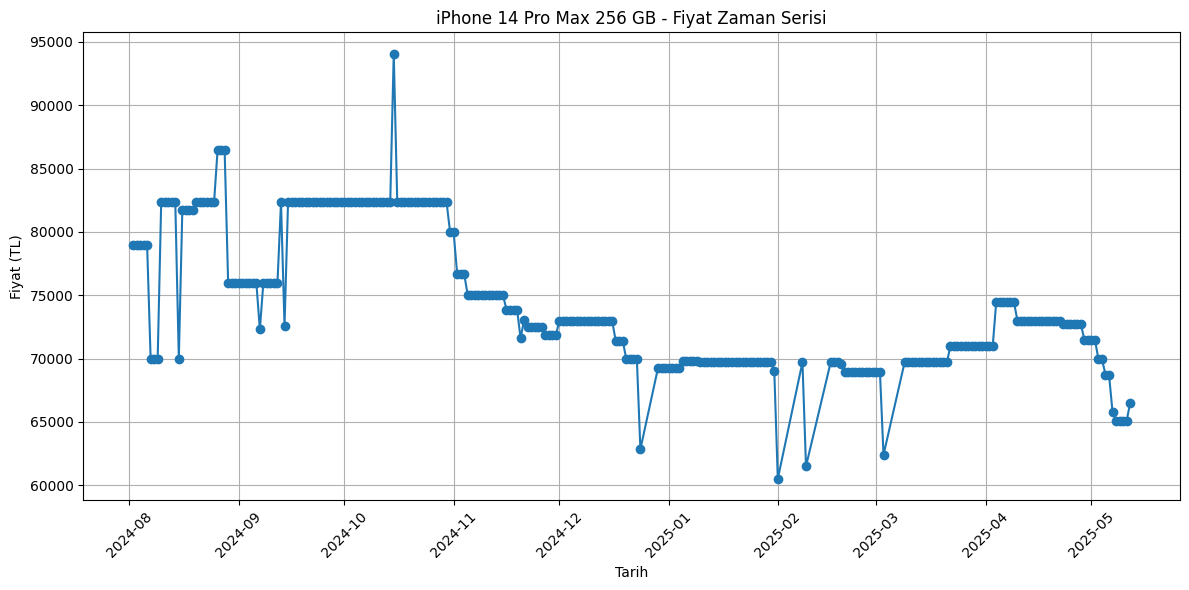

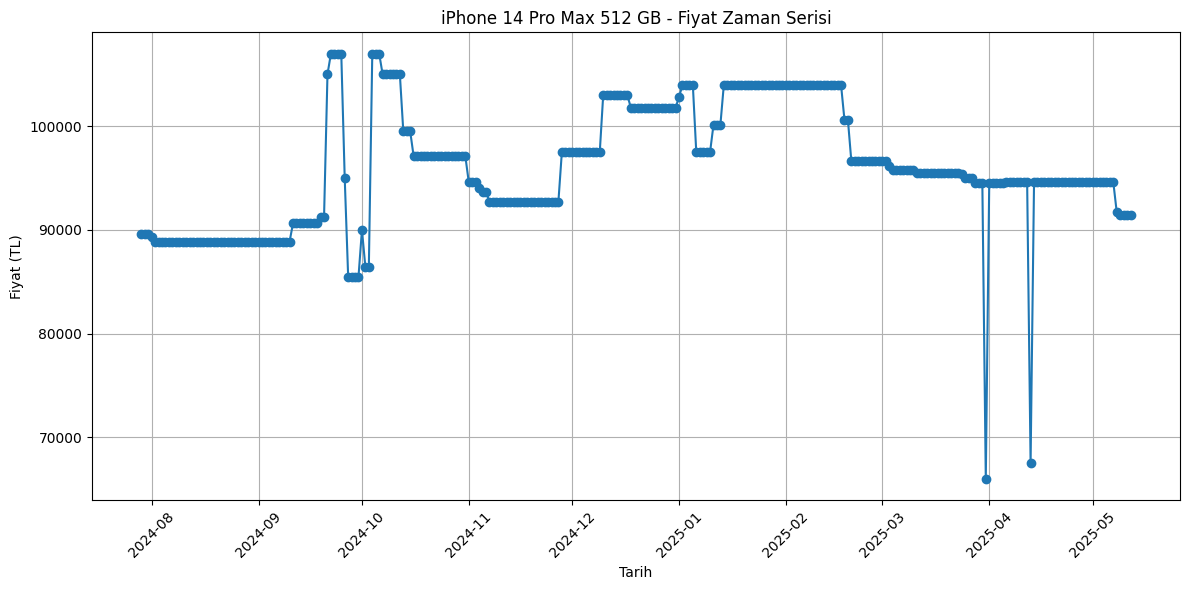

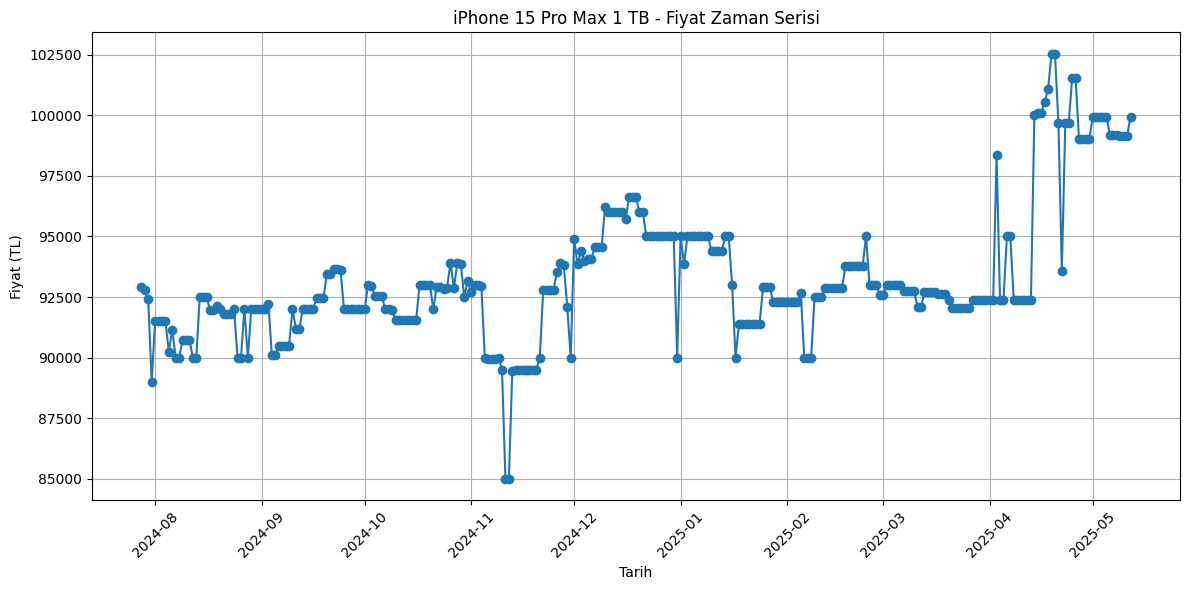

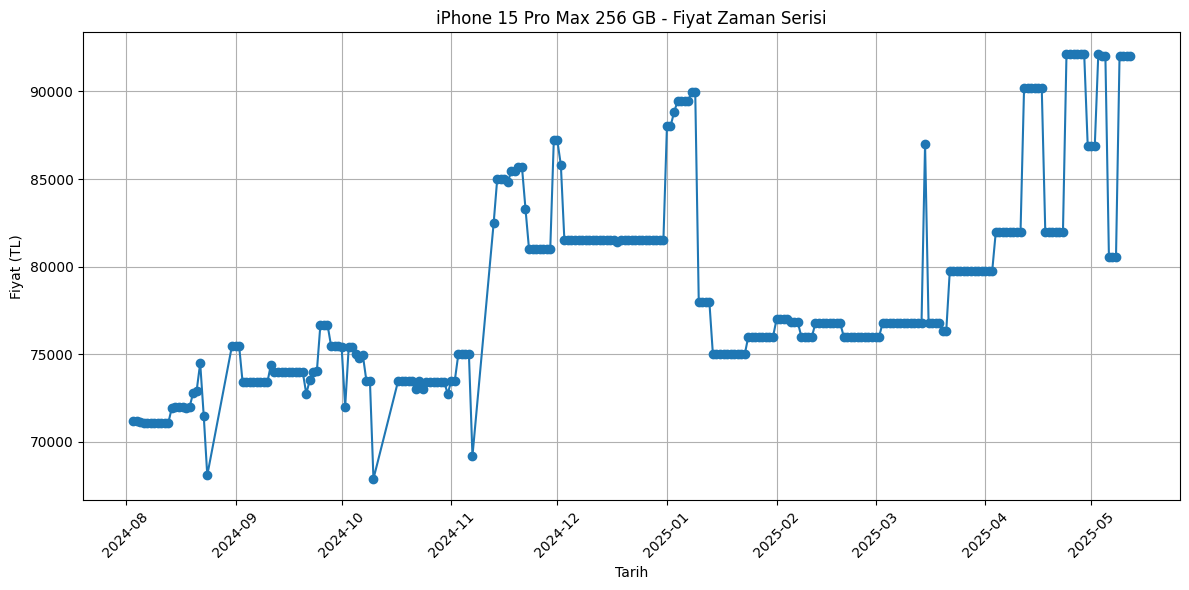

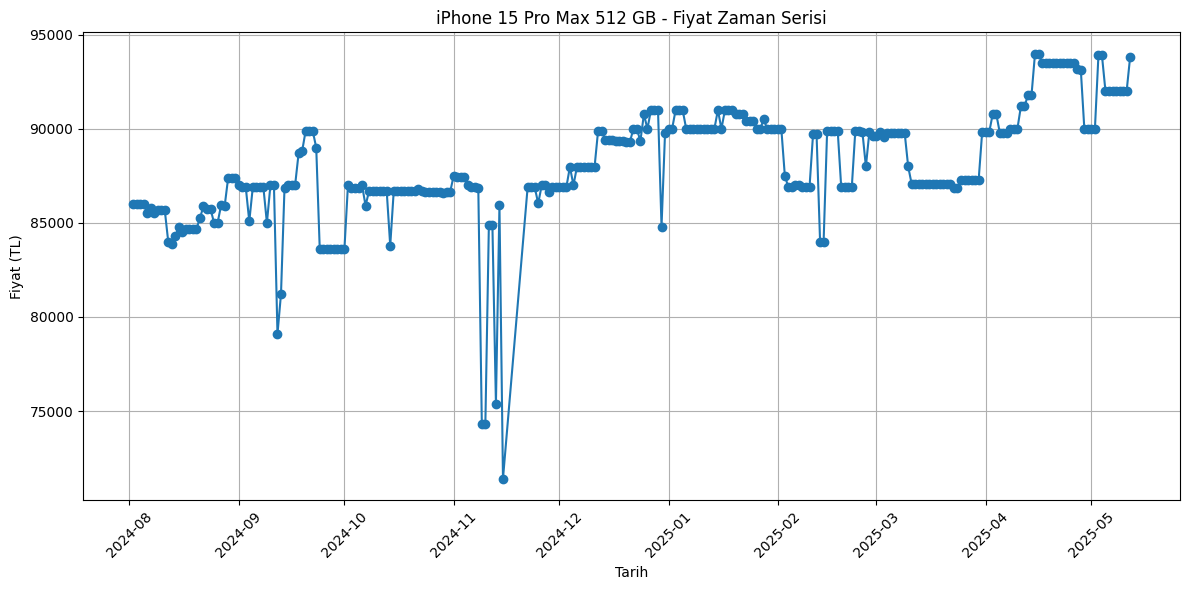

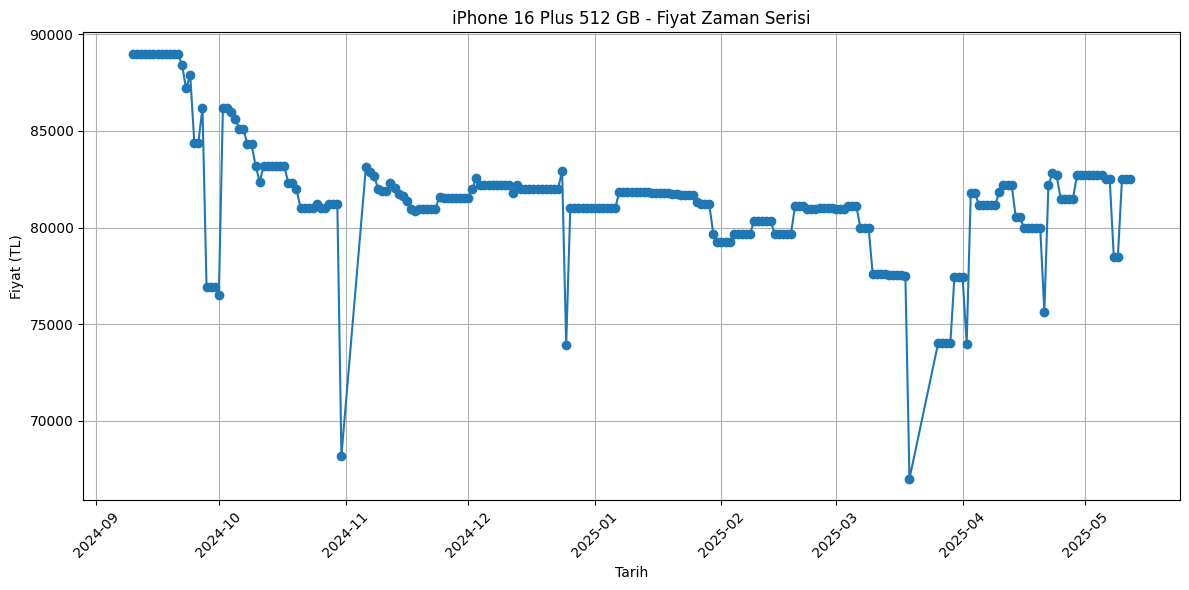

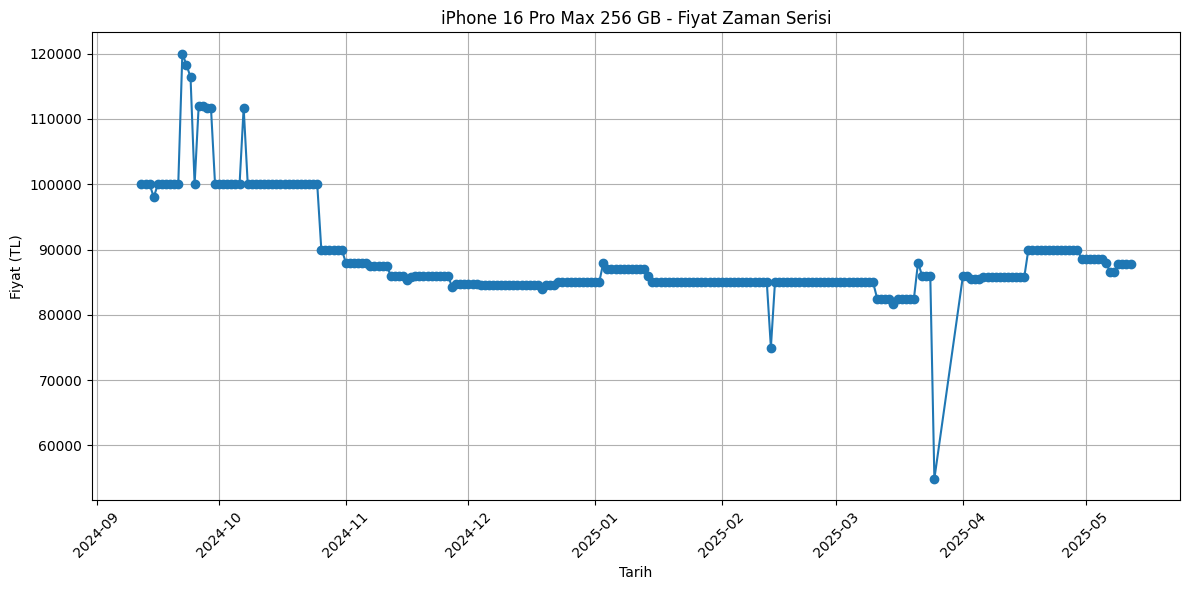

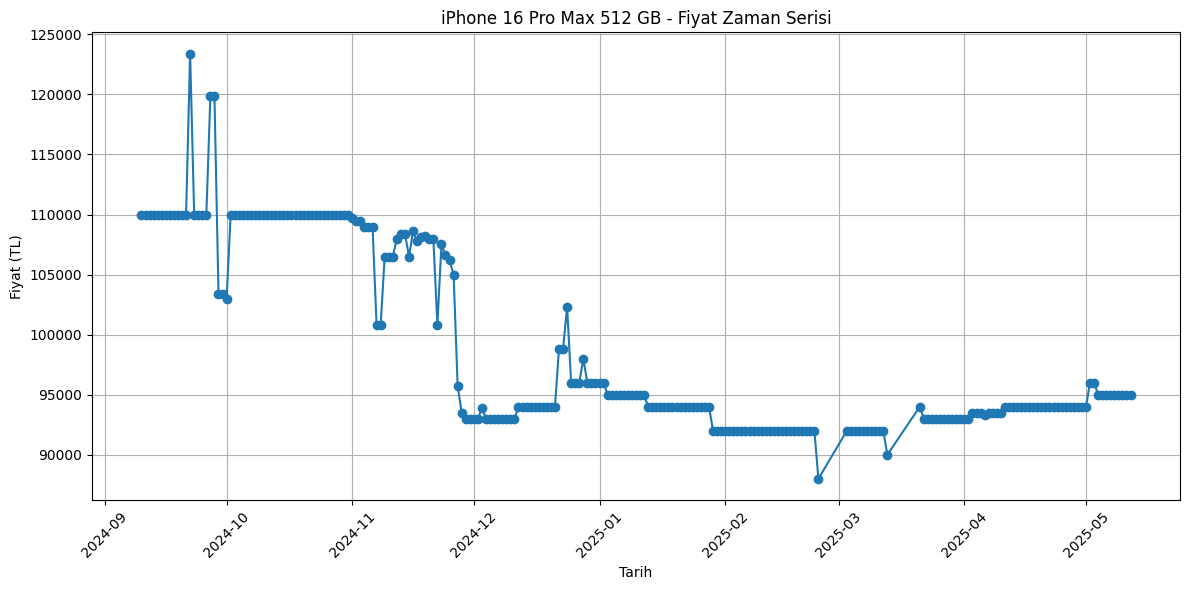

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_csv(r"csv/akakce.csv")

# Fiyat sütununu temizle
df["Price"] = df["Price"].apply(
    lambda x: int(str(x).replace(" TL", "").split(",")[0].replace(".", ""))
)
df["Price"] = df["Price"].astype(int)

# Türkiye tarih formatı: 'gün.ay.yıl'
df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y", errors="coerce")

# Aynı ürün ve aynı tarih varsa sadece bir tanesini tut
df = df.sort_values(["Product Name", "Date"])
df = df.drop_duplicates(subset=["Product Name", "Date"]).reset_index(drop=True)

# Her bir ürün için grafik çiz
product_names = df["Product Name"].unique()

output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)  # Grafiklerin kaydedileceği klasör
print(len(product_names))
for product in product_names:
    product_df = df[df["Product Name"] == product].sort_values("Date")

    # Grafik çiz
    plt.figure(figsize=(12, 6))
    plt.plot(product_df["Date"], product_df["Price"], marker="o")
    plt.title(f"{product} - Fiyat Zaman Serisi")
    plt.xlabel("Tarih")
    plt.ylabel("Fiyat (TL)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    # Grafik dosyasını kaydet (boşluklar yerine alt çizgi kullan)
    filename = f"{output_dir}/{product.replace(' ', '_')}.png"
    #plt.savefig(filename)
    #plt.show()
    #plt.close()

    print(f"Grafik kaydedildi: {filename}")

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
import os

warnings.filterwarnings("ignore")

# Veriyi yükle
df = pd.read_csv(r"csv/akakce.csv")

# Fiyat sütununu temizle
df["Price"] = df["Price"].apply(
    lambda x: int(str(x).replace(" TL", "").split(",")[0].replace(".", ""))
)
df["Price"] = df["Price"].astype(int)

# Tarih sütununu dönüştür
df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y", errors="coerce")

# Aynı ürün ve aynı tarih varsa sadece bir tanesini tut
df = df.sort_values(["Product Name", "Date"])
df = df.drop_duplicates(subset=["Product Name", "Date"]).reset_index(drop=True)

# Ürün isimlerini al
product_names = df["Product Name"].unique()

# Tahminlerin kaydedileceği klasör
output_dir = "predictions"
os.makedirs(output_dir, exist_ok=True)

# Her ürün için döngü
for product in product_names:
    product_df = df[df["Product Name"] == product].sort_values("Date")

    if len(product_df) < 10:
        print(f"Yetersiz veri: {product} (atlandı)")
        continue

    try:
        model = ARIMA(product_df["Price"], order=(3, 1, 1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=5)

        # Grafik
        plt.figure(figsize=(10, 5))
        plt.plot(product_df["Date"], product_df["Price"], label="Gerçek Fiyat")
        future_dates = pd.date_range(
            start=product_df["Date"].iloc[-1], periods=6, freq="D"
        )[1:]
        plt.plot(future_dates, forecast, label="Tahmin", color="red", marker="o")
        plt.title(f"{product} - 5 Günlük Fiyat Tahmini")
        plt.xlabel("Tarih")
        plt.ylabel("Fiyat (TL)")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # Kaydet
        filename = f"{output_dir}/{product.replace(' ', '_')}_forecast.png"
        plt.savefig(filename)
        plt.close()
        print(f"Tahmin grafiği kaydedildi: {filename}")

    except Exception as e:
        print(f"Hata oluştu ({product}): {e}")

Tahmin grafiği kaydedildi: predictions/AGM_G2_Guardian_256_GB_forecast.png
Tahmin grafiği kaydedildi: predictions/Honor_Magic_7_Pro_512_GB_forecast.png
Tahmin grafiği kaydedildi: predictions/Honor_Magic_V2_512_GB_forecast.png
Tahmin grafiği kaydedildi: predictions/Honor_Magic_V3_512_GB_forecast.png
Tahmin grafiği kaydedildi: predictions/Huawei_M_Pen_Lite_Kalem_Matepad_Se_Tablet_Kalemi_(Huawei_Türkiye_Garantili)_forecast.png
Tahmin grafiği kaydedildi: predictions/Huawei_Pura_70_Ultra_512_GB_forecast.png
Tahmin grafiği kaydedildi: predictions/Nubia_Red_Magic_9S_Pro_512_GB_16_GB_Gümüş_forecast.png
Tahmin grafiği kaydedildi: predictions/Samsung_Galaxy_S22_Ultra_256_GB_12_GB_forecast.png
Tahmin grafiği kaydedildi: predictions/Samsung_Galaxy_S23_Ultra_256_GB_12_GB_forecast.png
Tahmin grafiği kaydedildi: predictions/Samsung_Galaxy_S23_Ultra_512_GB_12_GB_forecast.png
Tahmin grafiği kaydedildi: predictions/Samsung_Galaxy_S24_Ultra_256_GB_forecast.png
Tahmin grafiği kaydedildi: predictions/Samsu

8586    60734.934510
8587    61553.449033
8588    62849.224316
8589    63735.242697
8590    63630.736630
Name: predicted_mean, dtype: float64


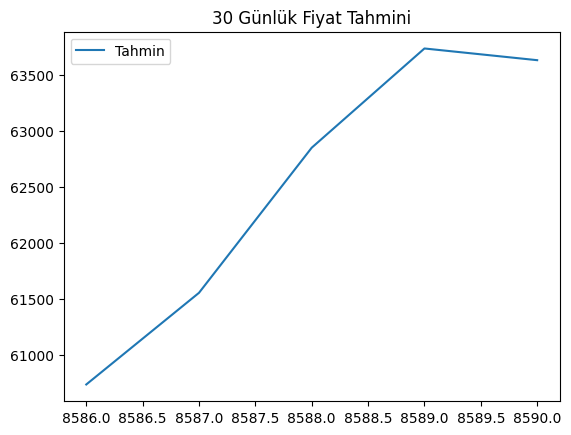

In [ ]:
import matplotlib.pyplot as plt



In [88]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Price'])  # Zaman serisi burada 'fiyat'
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -13.061815381715638
p-value: 2.040012924608827e-24


In [89]:
df['price_diff'] = df['Price'].diff().dropna()
df.dropna(subset=['price_diff'], inplace=True)
print(len(df))
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['price_diff'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")



8585
ADF Statistic: -28.09206883779014
p-value: 0.0


C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


8585    63730.727258
8586    64577.765674
8587    64554.819920
8588    64555.441507
8589    64555.424668
8590    64555.425125
8591    64555.425112
8592    64555.425112
8593    64555.425112
8594    64555.425112
Name: predicted_mean, dtype: float64


C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


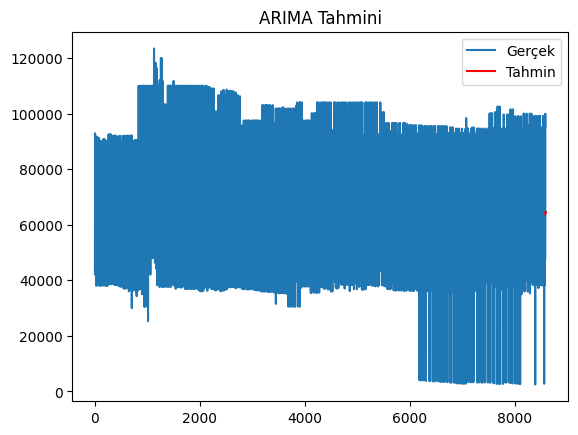

In [90]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

model = ARIMA(df['Price'], order=(1, 1, 1)) 
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
print(forecast)
plt.plot(df['Price'], label='Gerçek')
plt.plot(range(len(df), len(df)+10), forecast, label='Tahmin', color='red')
plt.title('ARIMA Tahmini')
plt.legend()
plt.show()


In [91]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

data = pd.DataFrame({
    'RAM': [8, 6, 4, 8, 16],
    'Depolama': [128, 128, 64, 256,512],
    'Ekran': [6.5, 6.3, 5.8, 6.7,6.7],
    'Kamera': [64, 48, 12, 108,200],
    'Fiyat': [17000, 19000, 20000, 25000,40000]
}

)

X = data[['RAM', 'Depolama', 'Ekran', 'Kamera']]
y = data['Fiyat']

model = KNeighborsRegressor(n_neighbors=2)
model.fit(X, y)

yeni_telefon = pd.DataFrame({
    'RAM': [6],
    'Depolama': [64],
    'Ekran': [5.2],
    'Kamera': [5]
})

tahmin = model.predict(yeni_telefon)
print(f"Estimation price: {tahmin[0]:.2f} TL")


Estimation price: 19500.00 TL


Estimation price: 7125.00 TL


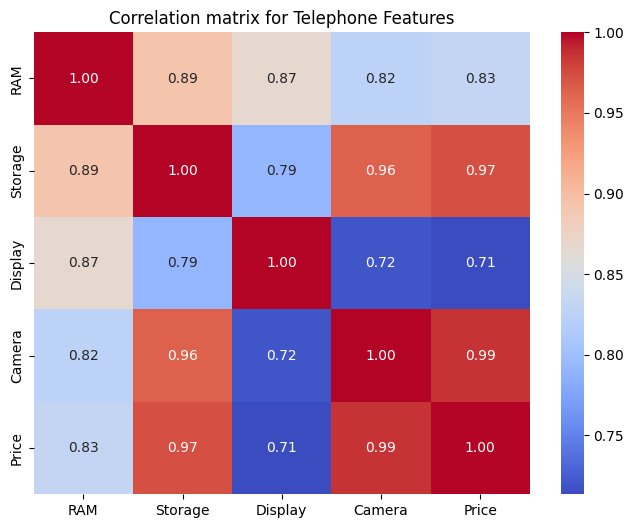

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

data = pd.DataFrame({
    'RAM':       [2, 4, 6, 8, 12, 4, 6, 8, 12, 16, 3, 6, 8, 8, 4, 6, 10, 12, 6, 8],
    'Storage':  [32, 64, 128, 128, 256, 64, 128, 128, 256, 512, 64, 128, 128, 256, 64, 128, 256, 512, 128, 256],
    'Display':     [5.0, 5.5, 6.1, 6.3, 6.7, 5.8, 6.0, 6.4, 6.5, 6.8, 5.2, 6.2, 6.3, 6.6, 5.5, 6.1, 6.6, 6.9, 6.3, 6.7],
    'Camera':    [8, 12, 16, 48, 64, 13, 20, 32, 64, 200, 5, 24, 48, 108, 12, 16, 64, 200, 50, 64],
    'Price':     [3000, 4500, 7000, 10000, 14000, 5000, 7500, 9000, 13000, 40000, 2500, 6800, 9800, 17000, 4900, 7200, 12000, 39000, 8500, 16000]
})

X = data[['RAM', 'Storage', 'Display', 'Camera']]
y = data['Price']

model = KNeighborsRegressor(n_neighbors=4)
model.fit(X, y)

yeni_telefon = pd.DataFrame({
    'RAM': [1],
    'Storage': [190],
    'Display': [5.2],
    'Camera': [2]
})

tahmin = model.predict(yeni_telefon)
print(f"Estimation price: {tahmin[0]:.2f} TL")
corr = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix for Telephone Features")
plt.show()


0        Apple iPhone 16 Pro
1        Apple iPhone 16 Pro
2        Apple iPhone 16 Pro
3    Apple iPhone 16 Pro Max
4       Apple iPhone 12 mini
5       Apple iPhone 12 mini
6       Apple iPhone 13 mini
7       Apple iPhone 13 mini
8            Apple iPhone XR
9            Apple iPhone XR
Name: phone_model, dtype: object
Estimation price: 1169.11 USD


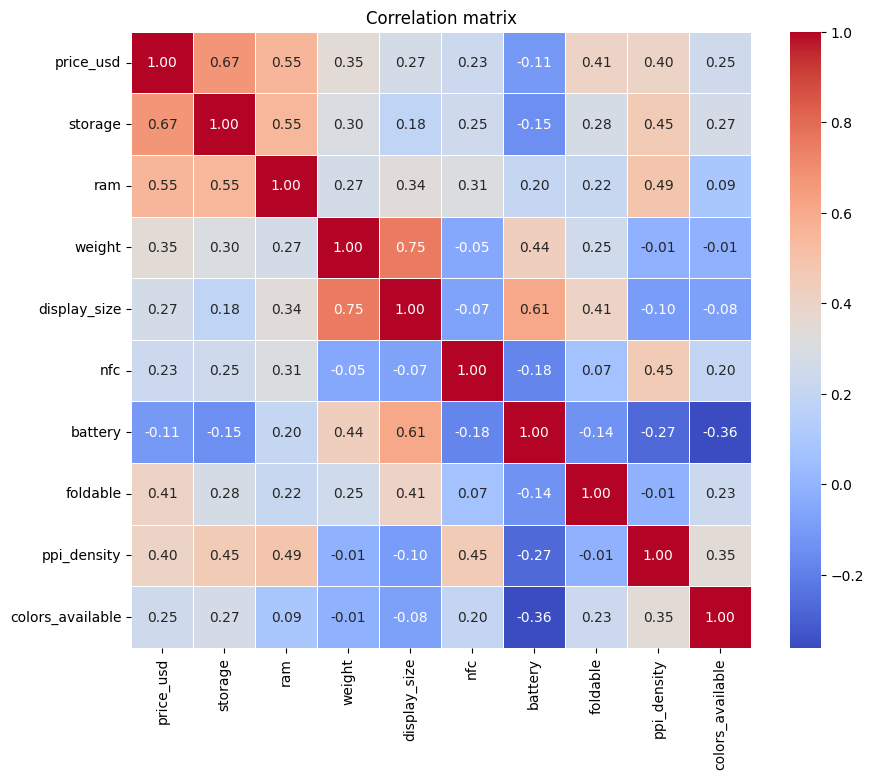

In [93]:
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"csv/phones.csv")

X = df[["ram", "storage", "display_size", "weight"]]
y = df["price_usd"]

print(df["phone_model"].head(10))

df["phone_model"].to_csv(r"csv/phoneNames.csv", index=False)

model = KNeighborsRegressor(n_neighbors=4)
model.fit(X, y)

yeni_telefon = pd.DataFrame(
    [{"ram": 700, "storage": 1024, "display_size": 6.2, "weight": 199.0}]
)

tahmin = model.predict(yeni_telefon)
print(f"Estimation price: {tahmin[0]:.2f} USD")


numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation matrix")
plt.show()

In [94]:
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv(r"csv/trendyolyeni.csv")

# İlk 5 ürünü görüntüle
print(df["Description"].head(5))

# Ürün açıklamalarını ';' ile böl
product = df["Description"].str.split(";")


# Her ürün açıklamasını anahtar-değer çiftine dönüştürmek
def process_product_description(description):
    product_dict = {}
    for item in description:
        # ":" ile bölerek anahtar ve değeri ayır
        if ":" in item:
            key, value = item.split(":", 1)
            product_dict[key.strip()] = value.strip()  # boşlukları temizle
    return product_dict


# Her ürün için sözlük oluştur
product_list = product.map(process_product_description)

# Sonuçları yazdır
print(product_list.head(5))

product_df = pd.DataFrame(product_list.tolist())
product_df.to_csv("csv/parsed_trendyol.csv", index=False, encoding="utf-8-sig")

0    Garanti Tipi:Apple Türkiye Garantili; Kamera Ç...
1    Garanti Tipi:İthalatçı Garantili; Kamera Çözün...
2    Garanti Tipi:Apple Türkiye Garantili; Kamera Ç...
3    Ekran Çözünürlüğü:FHD+; Ekran Boyutu:6,7 inç; ...
4    Garanti Tipi:Apple Türkiye Garantili; Kamera Ç...
Name: Description, dtype: object
0    {'Garanti Tipi': 'Apple Türkiye Garantili', 'K...
1    {'Garanti Tipi': 'İthalatçı Garantili', 'Kamer...
2    {'Garanti Tipi': 'Apple Türkiye Garantili', 'K...
3    {'Ekran Çözünürlüğü': 'FHD+', 'Ekran Boyutu': ...
4    {'Garanti Tipi': 'Apple Türkiye Garantili', 'K...
Name: Description, dtype: object


In [95]:
import pandas as pd

df = pd.read_csv(r"csv/phones.csv")

df = df.drop_duplicates(subset=["phone_model"]).reset_index(drop=True)

df["launch_date"] = pd.to_datetime(
    df["launch_date"], format="%m/%d/%Y", errors="coerce"
)

df = df[df["launch_date"] > "2023-01-20"].reset_index(drop=True)

print(df["phone_model"])

df["phone_model"].to_csv(r"csv/phones_after_2023.csv", index=False, encoding="utf-8-sig")

0          Apple iPhone 16 Pro
1      Apple iPhone 16 Pro Max
2              Apple iPhone 15
3      Apple iPhone 15 Pro Max
4         Apple iPhone 15 Plus
                ...           
191             Huawei Pura 70
192                 Realme 12x
193               vivo iQOO 12
194                  vivo X100
195            Xiaomi Mix Flip
Name: phone_model, Length: 196, dtype: object
